In [1]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

In [18]:
# Dias de permanência por hospital

df_Hosp = pd.read_excel(r'https://github.com/edufurlani/DoencasRespiratorias/raw/main/Data/DiasPermEstabSaude.xlsx')
df_Hosp = df_Hosp.iloc[:, :-1]
#df_Hosp.columns

df_Hosp.head()

Mês/ano de competência  2077531 A C CAMARGO CANCER CENTER  \
0                 jan/08                                 10   
1                 fev/08                                 52   
2                 mar/08                                 31   
3                 abr/08                                 20   
4                 mai/08                                112   

   2077655 ASSOC AACD V CLEMENTINO  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER  \
0                                                0   
1                                                8   
2                                               20   
3                                                0   
4                                               20   

   2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   2080575 HOSP BENEF PORTUGUESA  2078015 HOSP CLINICAS - HC DA FMUSP  \
0                            114                                    0   
1                            475                                 1546   
2                            627                                 2704   
3                            656                                 4181   
4                            236                                 2756   

   2075962 HOSP DA STA CASA DE STO AMARO  2077469 HOSP DOM ALVARENGA  ...  \
0                                    347                           0  ...   
1                                    269                          83  ...   
2                                    455                         121  ...   
3                                    502                         192  ...   
4                                    449                         432  ...   

   2082624 HOSPITAL JAPONES SANTA CRUZ  2077507 HOSPITAL LEFORTE - LIBERDADE  \
0                                    0                                    44   
1                                    0                                    76   
2                                    0                                   134   
3                                    0                                    44   
4                                    0                                   130   

   2076896 HOSPITAL SAO LUIZ GONZAGA  6891411 IBCC UNIDADE JACANA  \
0                                  3                            0   
1                                557                            0   
2                                470                            0   
3                                642                            0   
4                                913                            0   

   2077590 INST BRAS. CONTROLE CANCER-IBCC  \
0                                        0   
1                                        1   
2                                       15   
3                                       20   
4                                        7   

   2091550 INST CEMA DE OFTALMO E OTORRINO  \
0                                        4   
1                                        7   
2                                        3   
3                                        7   
4                                        6   

   6123

In [19]:
# Quebrando a coluna de data

df_Hosp['Mês/ano de competência'] = pd.to_datetime(df_Hosp['Mês/ano de competência'], format='%b/%y')

# Dividindo por ano/mes/dia
df_Hosp['Ano'] = df_Hosp['Mês/ano de competência'].dt.year
df_Hosp['Mês'] = df_Hosp['Mês/ano de competência'].dt.month

df_Hosp.drop('Mês/ano de competência',axis=1, inplace=True)

df_Hosp.head(5)

2077531 A C CAMARGO CANCER CENTER  2077655 ASSOC AACD V CLEMENTINO  \
0                                 10                                0   
1                                 52                                0   
2                                 31                                0   
3                                 20                                0   
4                                112                                0   

   2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER  \
0                                                0   
1                                                8   
2                                               20   
3                                                0   
4                                               20   

   2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   2080575 HOSP BENEF PORTUGUESA  2078015 HOSP CLINICAS - HC DA FMUSP  \
0                            114                                    0   
1                            475                                 1546   
2                            627                                 2704   
3                            656                                 4181   
4                            236                                 2756   

   2075962 HOSP DA STA CASA DE STO AMARO  2077469 HOSP DOM ALVARENGA  \
0                                    347                           0   
1                                    269                          83   
2                                    455                         121   
3                                    502                         192   
4                                    449                         432   

   2028840 HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS  ...  \
0                                                146          ...   
1                                                 40          ...   
2                                                162          ...   
3                                                  0          ...   
4                                                211          ...   

   2076896 HOSPITAL SAO LUIZ GONZAGA  6891411 IBCC UNIDADE JACANA  \
0                                  3                            0   
1                                557                            0   
2                                470                            0   
3                                642                            0   
4                                913                            0   

   2077590 INST BRAS. CONTROLE CANCER-IBCC  \
0                                        0   
1                                        1   
2                                       15   
3                                       20   
4                                        7   

   2091550 INST CEMA DE OFTALMO E OTORRINO  \
0                                        4   
1                                        7   
2                                        3   
3                                        7   
4                                        6   

   6123740 INST DO CANCER DO ESTADO DE SAO PAULO  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4            

In [20]:
# Agrupando todas as colunas em uma

df_serie_hist  = df_Hosp.melt(id_vars=['Ano', 'Mês'], var_name='Hospital', value_name='Internações')

# Buscando o máximo de internações que cada hospital teve na série histórica

max_internacoes_por_hospital = df_serie_hist.groupby('Hospital')['Internações'].max()

# Adicionando uma coluna para o máximo de internações na série histórica

df_serie_hist['Lotação Máxima'] = df_serie_hist['Hospital'].map(max_internacoes_por_hospital)

# Adicionando uma coluna com a porcentagem de ocupação

df_serie_hist['Ocupação'] = (df_serie_hist['Internações'] / df_serie_hist['Lotação Máxima'])*100

# Filtro

#df_serie_hist.loc[df_serie_hist['Hospital'] == 'Nome do hospital']

# Vizualização
df_serie_hist.to_csv("serie_hist.csv", index=False)
df_serie_hist.head(12)


Ano  Mês                           Hospital  Internações  Lotação Máxima  \
0   2008    1  2077531 A C CAMARGO CANCER CENTER           10             413   
1   2008    2  2077531 A C CAMARGO CANCER CENTER           52             413   
2   2008    3  2077531 A C CAMARGO CANCER CENTER           31             413   
3   2008    4  2077531 A C CAMARGO CANCER CENTER           20             413   
4   2008    5  2077531 A C CAMARGO CANCER CENTER          112             413   
5   2008    6  2077531 A C CAMARGO CANCER CENTER           30             413   
6   2008    7  2077531 A C CAMARGO CANCER CENTER           89             413   
7   2008    8  2077531 A C CAMARGO CANCER CENTER           54             413   
8   2008    9  2077531 A C CAMARGO CANCER CENTER          150             413   
9   2008   10  2077531 A C CAMARGO CANCER CENTER          172             413   
10  2008   11  2077531 A C CAMARGO CANCER CENTER           38             413   
11  2008   12  2077531 A C CAMARGO CANCER CENTER          193             413   

     Ocupação  
0    2.421308  
1   12.590799  
2    7.506053  
3    4.842615  
4   27.118644  
5    7.263923  
6   21.549637  
7   13.075061  
8   36.319613  
9   41.646489  
10   9.200969  
11  46.731235

In [21]:
# Salvando as colunas Hospital e Lotação Máxima do dataframe df_serie_hist

ocupacao = df_serie_hist[['Hospital', 'Lotação Máxima']]

# Descobrindo a média de internações para cada mês e hospital, com base na série histórica

df_media_hist = df_serie_hist.groupby(['Hospital', 'Mês'])['Internações'].mean().astype(int).reset_index()

# Adicionando as colunas salvas anteriormente

df_media_hist = df_media_hist.merge(ocupacao, on=['Hospital'])

# Calculando a taxa de ocupação

df_media_hist['taxa_ocupacao'] = (df_media_hist['Internações'] / df_media_hist['Lotação Máxima'])*100

# Dropando as linhas duplicadas

df_media_hist.drop_duplicates(inplace=True)

# Filtro

#df_media_hist.loc[df_media_hist['Hospital'] == 'Nome do hospital']

# Vizualização
df_media_hist.head()

Hospital  Mês  Internações  \
0    0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    1           83   
187  0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    2          111   
374  0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    3          112   
561  0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    4           66   
748  0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...    5           88   

     Lotação Máxima  taxa_ocupacao  
0              1800       4.611111  
187            1800       6.166667  
374            1800       6.222222  
561            1800       3.666667  
748            1800       4.888889

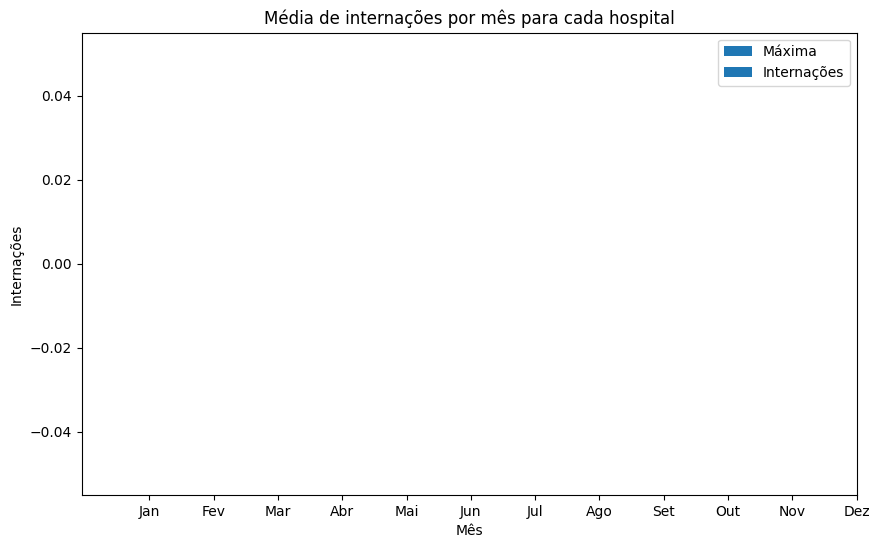

In [22]:
# Criar uma figura e eixos
plt.figure(figsize=(10, 6))

# Iterar sobre cada hospital
hospital = input('Nome do hospital')
# Filtrar os dados apenas para o hospital atual
data_hospital = df_media_hist[df_media_hist['Hospital'] == hospital]

# Plotar os dados de internações para cada mês para o hospital atual

plt.bar(data_hospital['Mês'], data_hospital['Lotação Máxima'], label='Máxima')
plt.bar(data_hospital['Mês'], data_hospital['Internações'], label='Internações')

# Adicionar os valores das internações dentro das barras
for index, row in data_hospital.iterrows():
    plt.text(row['Mês'], row['Internações'] + 5, str(row['Internações']), ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Internações')
plt.title('Média de internações por mês para cada hospital')
plt.legend()

# Definir os ticks do eixo x para mostrar os meses
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Mostrar o gráfico
#plt.grid(True)
plt.show()

In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

Previsão para o hospital '2077531 A C CAMARGO CANCER CENTER':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2087.895, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2150.691, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2117.224, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2088.480, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2148.691, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2089.307, Time=0.49 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2089.321, Time=0.53 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2088.930, Time=1.98 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2089.156, Time=1.59 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2087.469, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2086.063, Time=0.26 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2087.921, Time=0.87 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2087.909, Time=0.56 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2087.981, Time=0.10 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:13:50 - cmdstanpy - INFO - Chain [1] start processing
22:13:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 97.40342023886494
MSE do modelo Prophet: 321.91417083716806
O modelo SARIMAX é o melhor para este hospital.


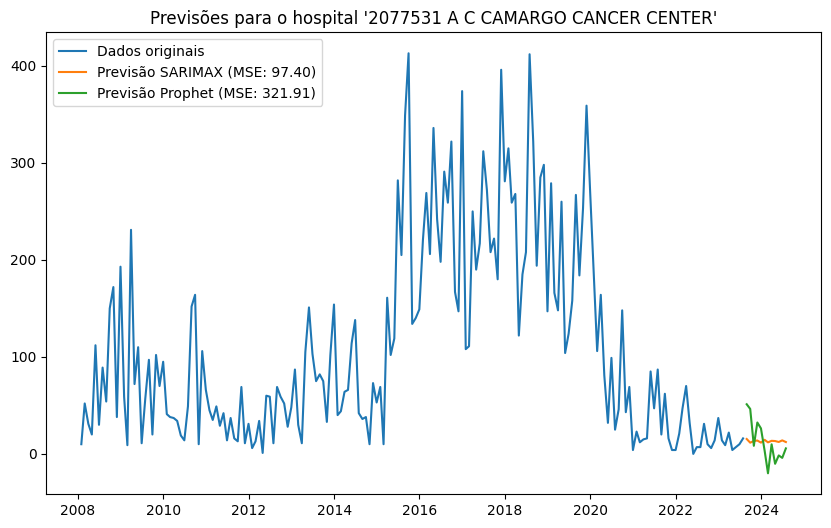

Previsão para o hospital '2077655 ASSOC AACD V CLEMENTINO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1294.063, Time=4.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1394.573, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1346.044, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1287.926, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1392.573, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1286.250, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1287.839, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1288.793, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1288.218, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1288.219, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1344.661, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1290.207, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1285.019, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1286.598, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1286.689, Time=0.09

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:14:00 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=1288.999, Time=0.30 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 8.365 seconds


22:14:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 110.17498900090362
MSE do modelo Prophet: 100.39180035893095
O modelo Prophet é o melhor para este hospital.


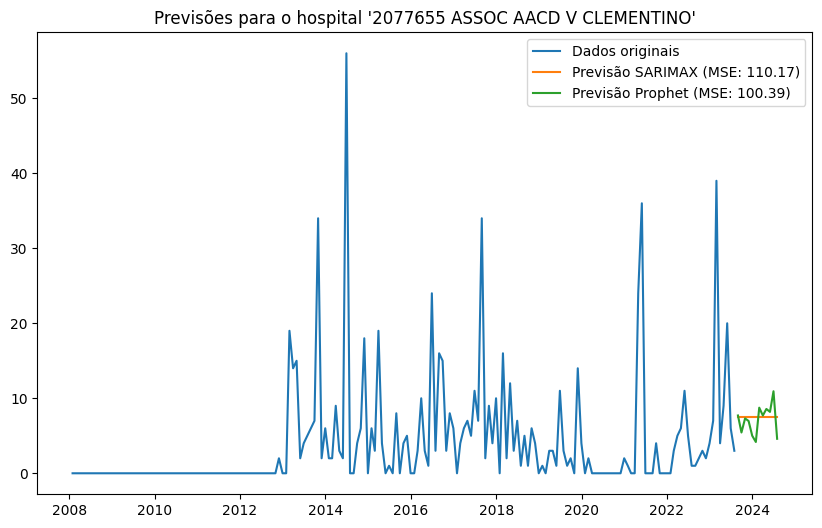

Previsão para o hospital '2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1975.071, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2067.319, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2003.699, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1989.266, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2065.462, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1973.190, Time=0.68 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1972.082, Time=0.46 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1973.237, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1984.610, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1970.110, Time=0.32 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1971.268, Time=0.54 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1971.219, Time=0.60 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=1973.095, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1987.349, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1981.828, Time=0.08

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:14:09 - cmdstanpy - INFO - Chain [1] start processing
22:14:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 78663.10227723805
MSE do modelo Prophet: 21713.335564004952
O modelo Prophet é o melhor para este hospital.


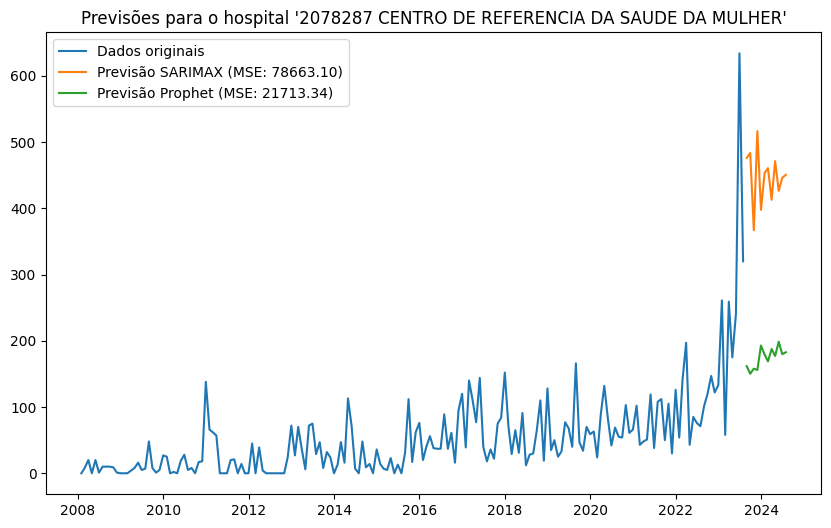

Previsão para o hospital '2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1187.977, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1299.137, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1240.262, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1185.155, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1297.137, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1184.031, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1185.215, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1187.051, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1185.085, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1185.114, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1238.413, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1187.085, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1182.031, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1183.215, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1183.155, Time=0.09

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:14:12 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=1185.085, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 2.444 seconds


22:14:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 0.010722815273378372
MSE do modelo Prophet: 11.581003871158986
O modelo SARIMAX é o melhor para este hospital.


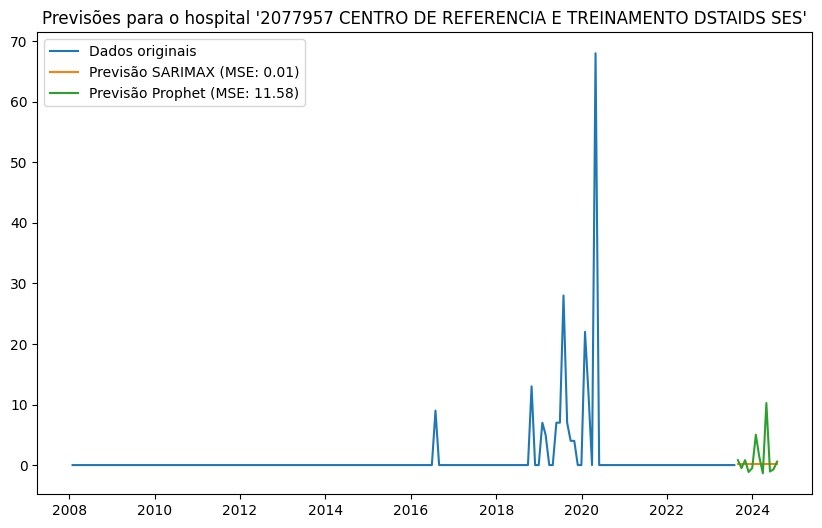

Previsão para o hospital '3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2282.243, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2338.953, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2295.483, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2275.131, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2336.959, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2273.364, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2275.125, Time=0.29 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2275.356, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2275.358, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2294.047, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2277.359, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2271.526, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2273.278, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2273.284, Time=0.29 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:14:18 - cmdstanpy - INFO - Chain [1] start processing
22:14:18 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 5116.092509665301
MSE do modelo Prophet: 9764.694633069334
O modelo SARIMAX é o melhor para este hospital.


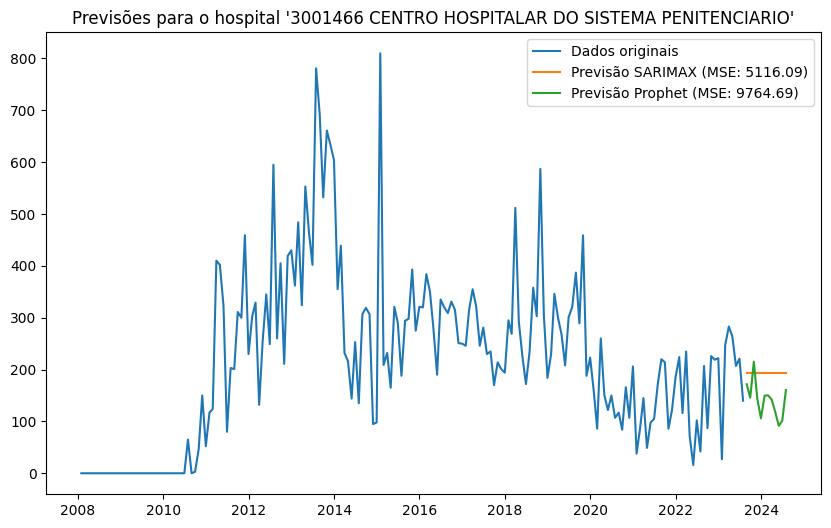

Previsão para o hospital '2080575 HOSP BENEF PORTUGUESA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2447.341, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2540.235, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2480.377, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2443.008, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2538.236, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2443.538, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2446.190, Time=0.55 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2443.031, Time=0.50 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2443.569, Time=0.32 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2533.827, Time=0.14 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2444.190, Time=0.44 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2444.158, Time=0.41 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2479.523, Time=0.18 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2445.306, Time=0.66 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:14:28 - cmdstanpy - INFO - Chain [1] start processing
22:14:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1299.7649247805373
MSE do modelo Prophet: 20784.367978755912
O modelo SARIMAX é o melhor para este hospital.


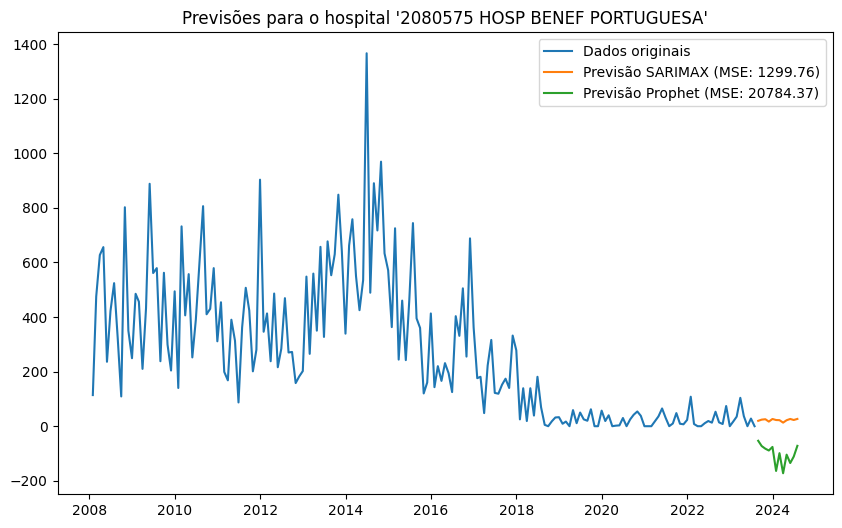

Previsão para o hospital '2078015 HOSP CLINICAS - HC DA FMUSP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2892.980, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2872.996, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2867.425, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2890.992, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2868.874, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2867.069, Time=0.65 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2866.762, Time=0.34 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2867.646, Time=0.98 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2893.931, Time=0.07 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2860.860, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2862.597, Time=0.28 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=2861.897, Time=1.39 sec
 ARIMA(0,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:14:42 - cmdstanpy - INFO - Chain [1] start processing
22:14:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 15336.709231868046
MSE do modelo Prophet: 147752.0060345148
O modelo SARIMAX é o melhor para este hospital.


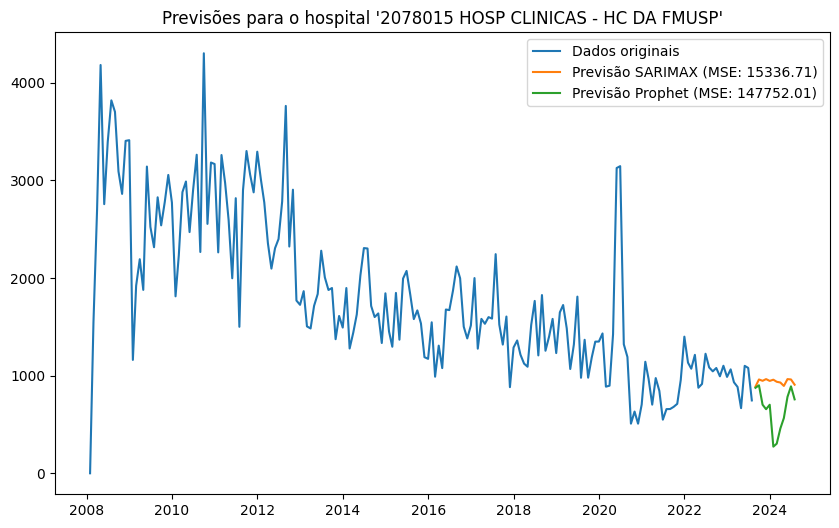

Previsão para o hospital '2075962 HOSP DA STA CASA DE STO AMARO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2241.341, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2330.277, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2254.197, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2256.357, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2328.277, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2241.401, Time=2.70 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2241.228, Time=2.03 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=2238.196, Time=1.66 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=2247.887, Time=1.40 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2238.507, Time=0.70 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.39 sec
 ARIMA(1,1,2)(0,0,1)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:15:35 - cmdstanpy - INFO - Chain [1] start processing
22:15:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 3591.2199473430665
MSE do modelo Prophet: 16797.78594714985
O modelo SARIMAX é o melhor para este hospital.


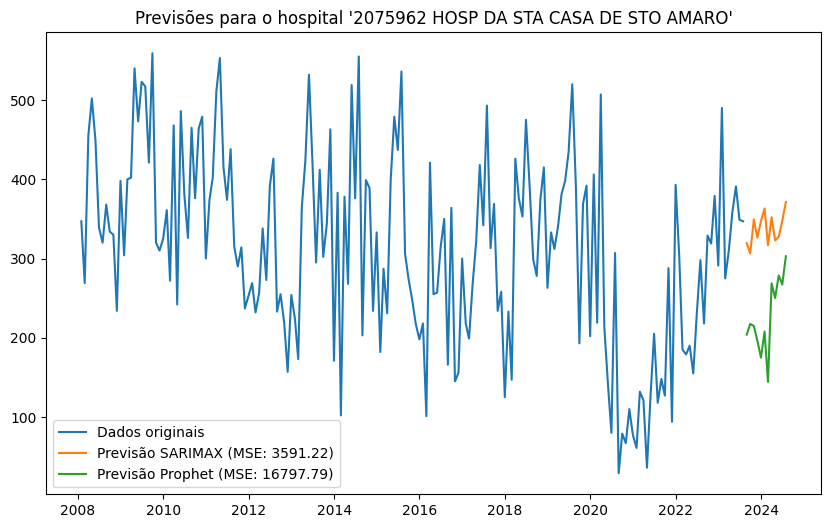

Previsão para o hospital '2077469 HOSP DOM ALVARENGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2064.492, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2192.557, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2091.932, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2066.696, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2190.557, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2062.877, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2066.251, Time=0.27 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2064.012, Time=1.74 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2062.499, Time=0.78 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2064.484, Time=1.64 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2062.435, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2066.827, Time=0.23 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2064.386, Time=1.45 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2064.409, Time=0.76 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:16:15 - cmdstanpy - INFO - Chain [1] start processing
22:16:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1.3294257729455437e-13
MSE do modelo Prophet: 1456.3896149265966
O modelo SARIMAX é o melhor para este hospital.


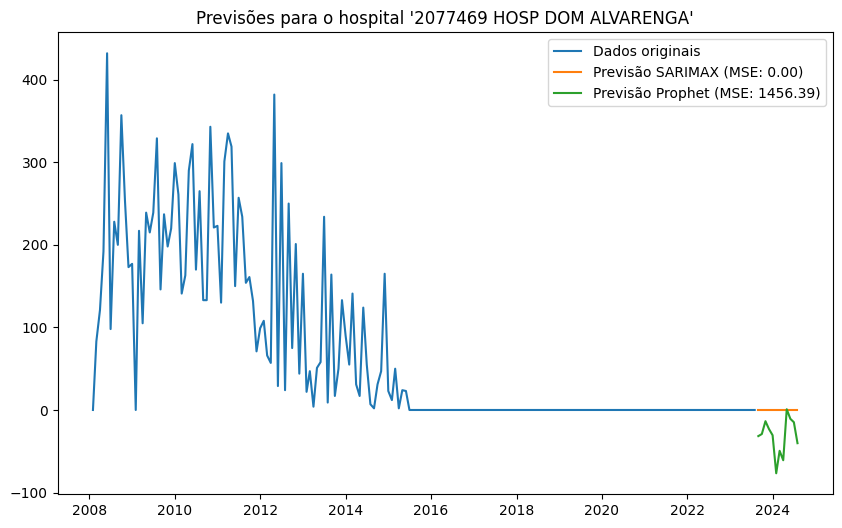

Previsão para o hospital '2028840 HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2307.765, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2304.859, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2301.904, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2305.768, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2300.459, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2301.821, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2303.385, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2285.934, Time=0.15 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2287.447, Time=0.36 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2287.503, Time=0.36 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=2289.247, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2275.440, Time=0.14 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:16:31 - cmdstanpy - INFO - Chain [1] start processing
22:16:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1505.4043360007488
MSE do modelo Prophet: 2743.7349581581852
O modelo SARIMAX é o melhor para este hospital.


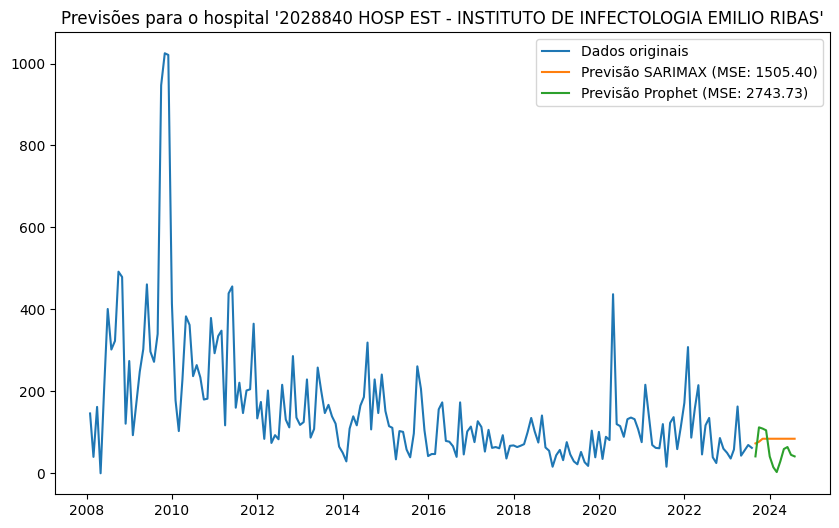

Previsão para o hospital '2088495 HOSP EST DANTE PAZZANESE- FUND ADIB JATENE':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2194.618, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2317.693, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2228.713, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2197.002, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2315.693, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2193.675, Time=0.78 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2191.676, Time=0.72 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2193.675, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2191.827, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2190.155, Time=0.30 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2192.132, Time=0.60 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=2192.133, Time=0.61 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2193.252, Time=0.88 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2193.972, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2219.814, Time=0.20

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:16:43 - cmdstanpy - INFO - Chain [1] start processing
22:16:43 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 6297.132798800118
MSE do modelo Prophet: 8794.31890540422
O modelo SARIMAX é o melhor para este hospital.


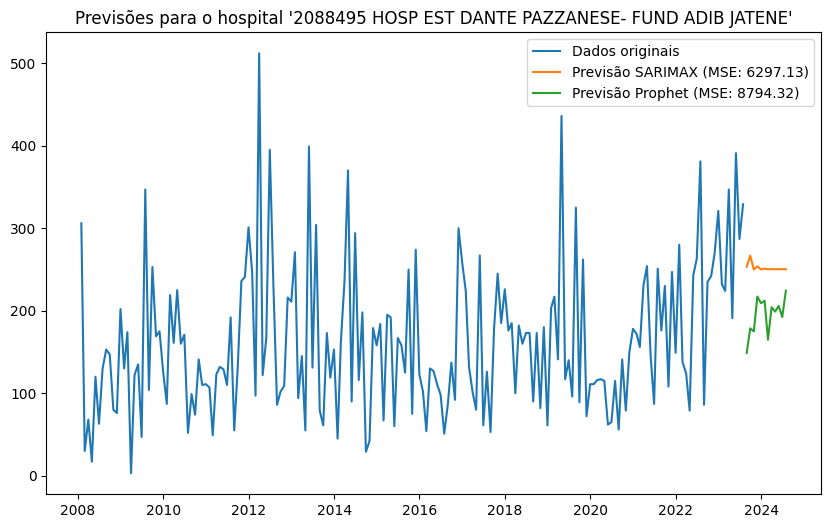

Previsão para o hospital '2077671 HOSP EST GRAJAU':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2924.225, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2887.722, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2922.236, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2886.623, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2887.745, Time=0.07 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2886.738, Time=0.65 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2877.326, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2876.235, Time=0.13 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2877.232, Time=0.34 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=2871.400, Time=0.85 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=2876.682, Time=0.09 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=2873.376, Time=2.05 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=2873.599, Time=1.72 sec
 ARIM

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:18:38 - cmdstanpy - INFO - Chain [1] start processing
22:18:38 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 18732.26746846199
MSE do modelo Prophet: 72779.5944230613
O modelo SARIMAX é o melhor para este hospital.


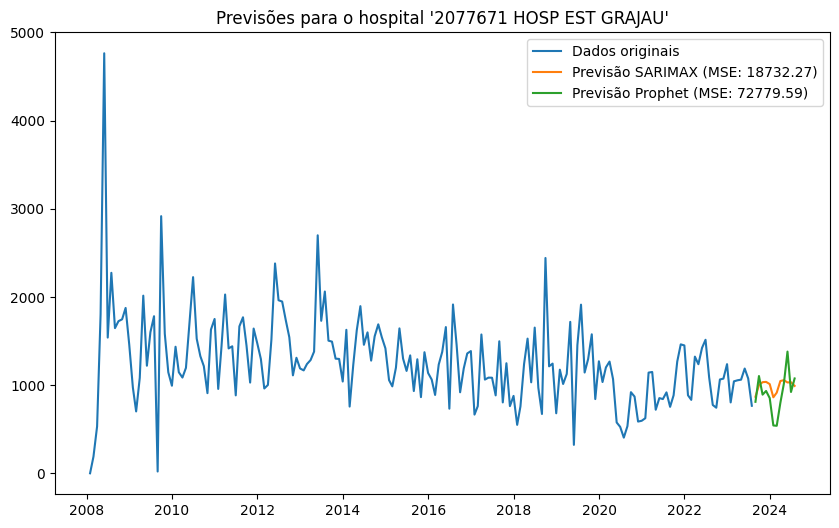

Previsão para o hospital '2079240 HOSP EST GUAIANASES - JESUS TEIXEIRA DA COSTA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2575.278, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2616.156, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2590.801, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2582.438, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2614.162, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2581.772, Time=0.84 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2580.129, Time=0.94 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2576.538, Time=2.30 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2576.491, Time=2.64 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2585.094, Time=0.83 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2579.988, Time=2.13 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2576.852, Time=2.79 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=2578.704, Time=3.21 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2573.253, Time=1.65 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2581.320, Time=1.55

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 3302.248341812749
MSE do modelo Prophet: 25199.472880405938
O modelo SARIMAX é o melhor para este hospital.


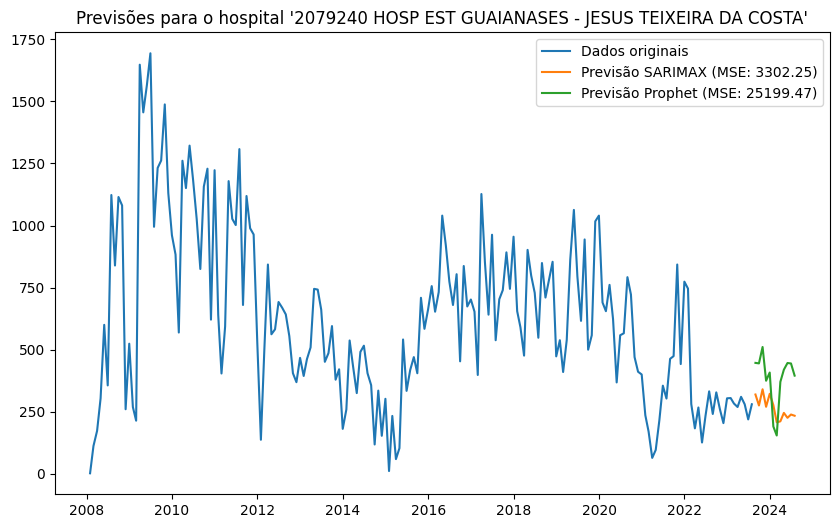

Previsão para o hospital '2066572 HOSP EST HELIOPOLIS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2452.260, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2537.523, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2467.381, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2447.212, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2535.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2454.330, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2446.947, Time=0.41 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2445.993, Time=0.29 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2447.402, Time=0.70 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2448.777, Time=1.19 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2526.908, Time=0.37 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2447.572, Time=0.36 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2447.687, Time=0.44 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2448.993, Time=0.72 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2443.993, Time=0.12

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:20:57 - cmdstanpy - INFO - Chain [1] start processing
22:20:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 17831.226150374263
MSE do modelo Prophet: 45552.77544389097
O modelo SARIMAX é o melhor para este hospital.


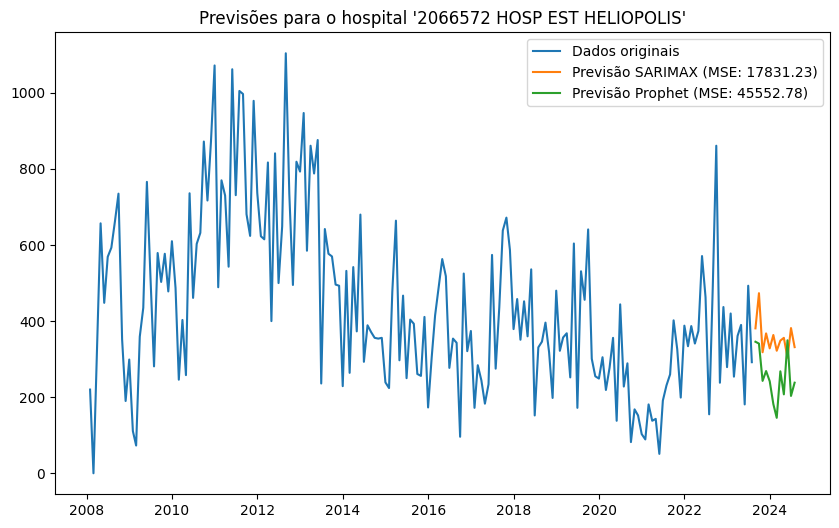

Previsão para o hospital '2088517 HOSP EST INF CANDIDO FONTOURA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2785.869, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2723.427, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2696.886, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2783.882, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2716.958, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2688.253, Time=0.65 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2689.479, Time=0.30 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2687.238, Time=2.20 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2692.466, Time=0.97 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=2692.159, Time=2.12 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2770.007, Time=1.12 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=2691.165, Time=2.42 sec
 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=2690.300, Time=2.14 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:21:32 - cmdstanpy - INFO - Chain [1] start processing
22:21:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 20111.480654589162
MSE do modelo Prophet: 57206.23443146713
O modelo SARIMAX é o melhor para este hospital.


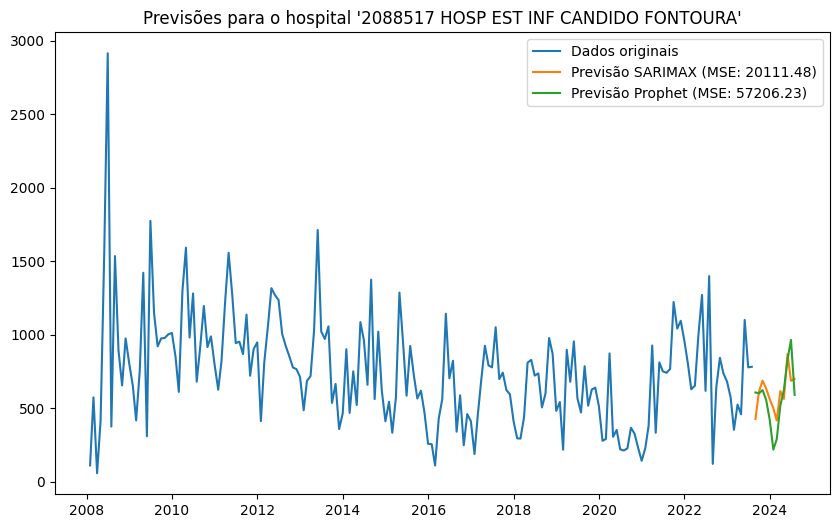

Previsão para o hospital '2071371 HOSP EST INF DARCY VARGAS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2397.520, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2378.892, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2371.724, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2395.614, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2381.173, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2370.587, Time=0.54 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2370.036, Time=0.27 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2371.654, Time=0.62 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2369.907, Time=1.71 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2369.634, Time=1.89 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2372.843, Time=0.68 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(0,1,2)(1

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:22:14 - cmdstanpy - INFO - Chain [1] start processing
22:22:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 13632.215698359554
MSE do modelo Prophet: 46438.22640620736
O modelo SARIMAX é o melhor para este hospital.


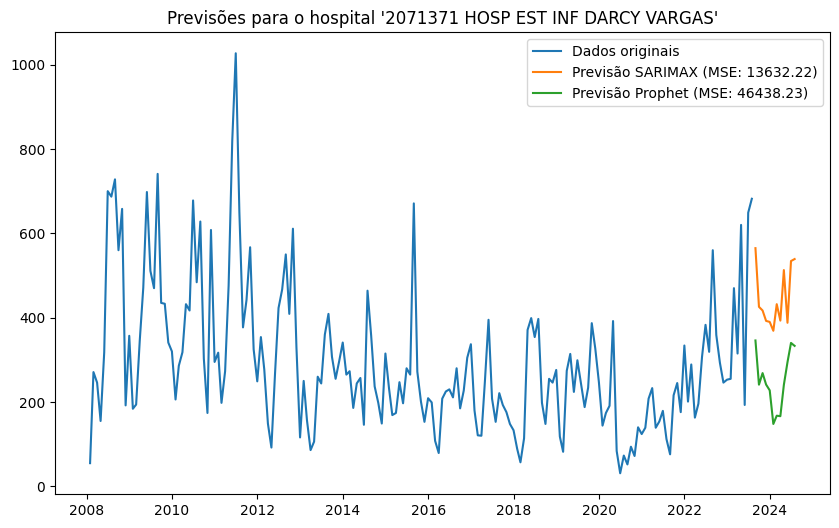

Previsão para o hospital '2077523 HOSP EST IPIRANGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2502.228, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2459.032, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2413.157, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2500.236, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2411.558, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2413.118, Time=0.23 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2414.275, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2412.996, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2413.065, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2457.130, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2413.399, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2409.949, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2411.483, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2411.528, Time=0.18 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:22:19 - cmdstanpy - INFO - Chain [1] start processing
22:22:19 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 13747.693507994618
MSE do modelo Prophet: 22038.244517281953
O modelo SARIMAX é o melhor para este hospital.


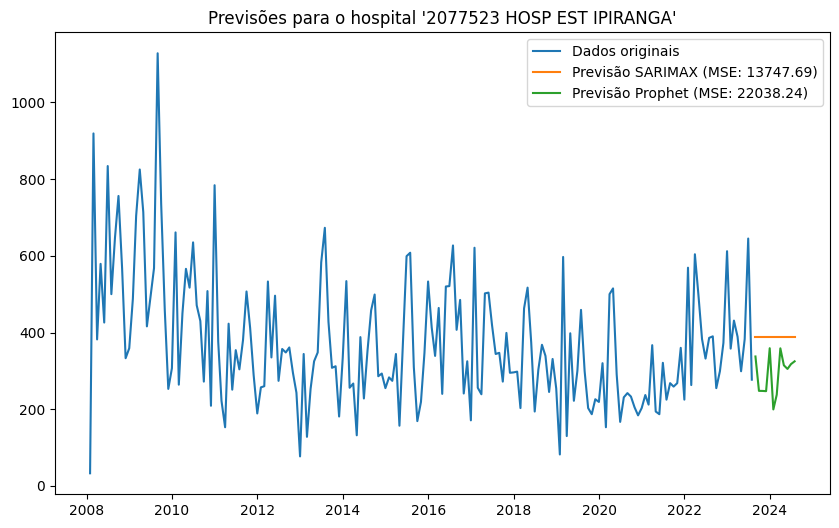

Previsão para o hospital '2077620 HOSP EST ITAIM PAULISTA (SANTA MARCELINA)':
Hospital '2077620 HOSP EST ITAIM PAULISTA (SANTA MARCELINA)' não encontrado.
Previsão para o hospital '5437156 HOSP EST LOCAL DE SAPOPEMBA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_hospital = data[data['Hospital'].str.contains(hospital_name, na=False, case=False)]
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2221.175, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2271.652, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2244.868, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2216.388, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2269.703, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2215.297, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2216.405, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2218.037, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2214.640, Time=0.17 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2215.662, Time=0.32 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2215.642, Time=0.44 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2217.173, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2243.897, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2216.570, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2216.565, Time=0.33

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:22:27 - cmdstanpy - INFO - Chain [1] start processing
22:22:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 13496.618985319596
MSE do modelo Prophet: 11146.900352395069
O modelo Prophet é o melhor para este hospital.


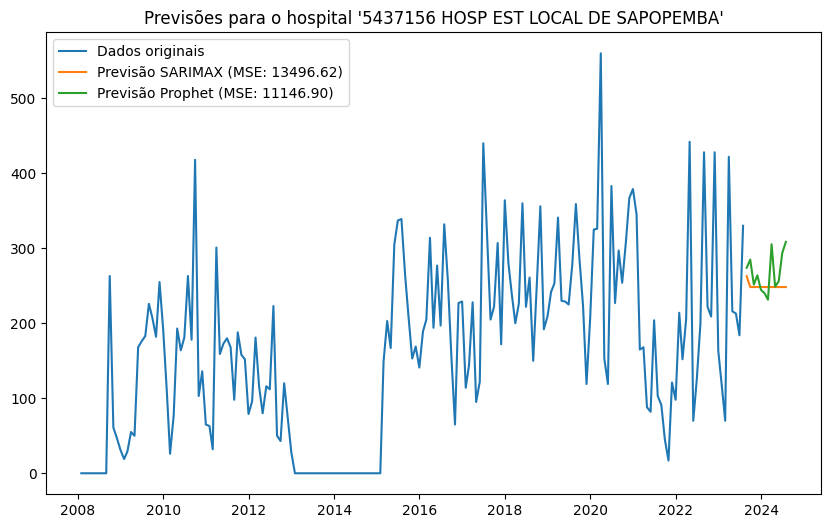

Previsão para o hospital '2077574 HOSP EST MANDAQUI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2829.264, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2859.496, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2829.425, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2835.515, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3227.769, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2829.446, Time=0.42 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=2828.111, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2831.291, Time=0.14 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=2824.908, Time=1.89 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=2826.447, Time=2.47 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=2827.216, Time=1.20 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=2825.606, Time=0.97 sec
 ARIMA(3,0,2)(2,0,0)[12] intercept   : AIC=2825.027, Time=2.71 sec
 ARIMA(2,0,3)(2,0,0)[12] intercept   : AIC=2825.710, Time=1.40 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=2826.077, Time=0.77

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:22:56 - cmdstanpy - INFO - Chain [1] start processing
22:22:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 45847.838681829664
MSE do modelo Prophet: 115351.75183362536
O modelo SARIMAX é o melhor para este hospital.


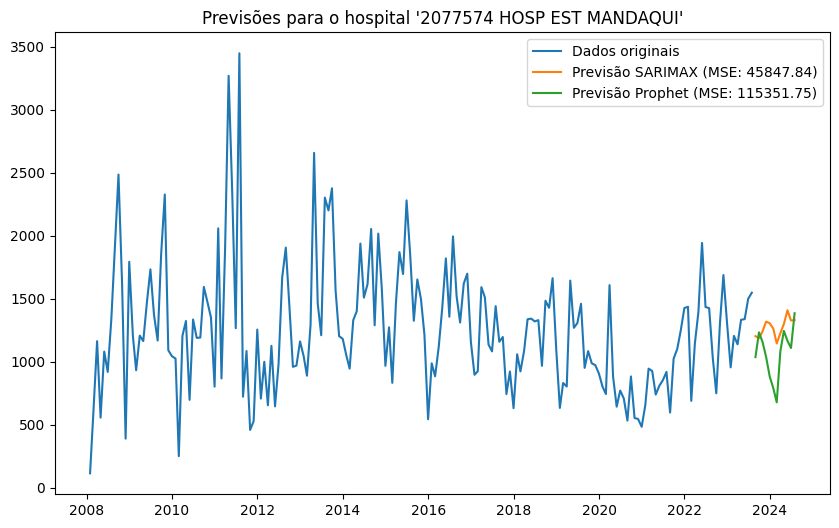

Previsão para o hospital '2065665 HOSP EST MAT INTERLAGOS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1637.439, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1777.147, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1713.053, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1775.148, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1635.502, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1633.779, Time=0.12 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1635.486, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1638.165, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1637.540, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=1634.725, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1636.343, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=1636.466, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:23:10 - cmdstanpy - INFO - Chain [1] start processing
22:23:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1670.0232937216285
MSE do modelo Prophet: 1468.38162292128
O modelo Prophet é o melhor para este hospital.


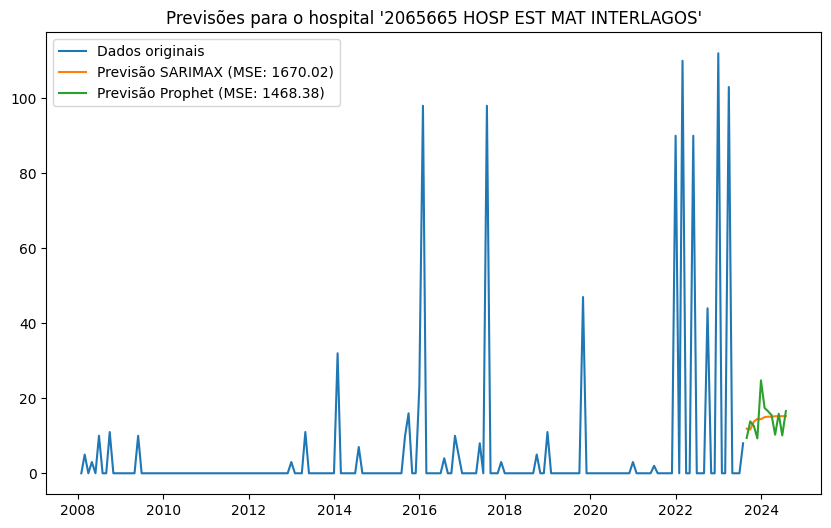

Previsão para o hospital '2077701 HOSP EST MAT LEONOR MENDES DE BARROS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1620.244, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1764.517, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1701.415, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1629.881, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1762.518, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1619.699, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1619.516, Time=0.21 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1619.330, Time=0.36 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1619.908, Time=1.65 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1621.900, Time=1.67 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1624.900, Time=0.39 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1621.009, Time=0.39 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=1617.183, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=1617.062, Time=0.25 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=1617.527, Time=0.53

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:24:37 - cmdstanpy - INFO - Chain [1] start processing
22:24:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\p

MSE do modelo SARIMAX: 47.926996741739394
MSE do modelo Prophet: 58.340227470008905
O modelo SARIMAX é o melhor para este hospital.


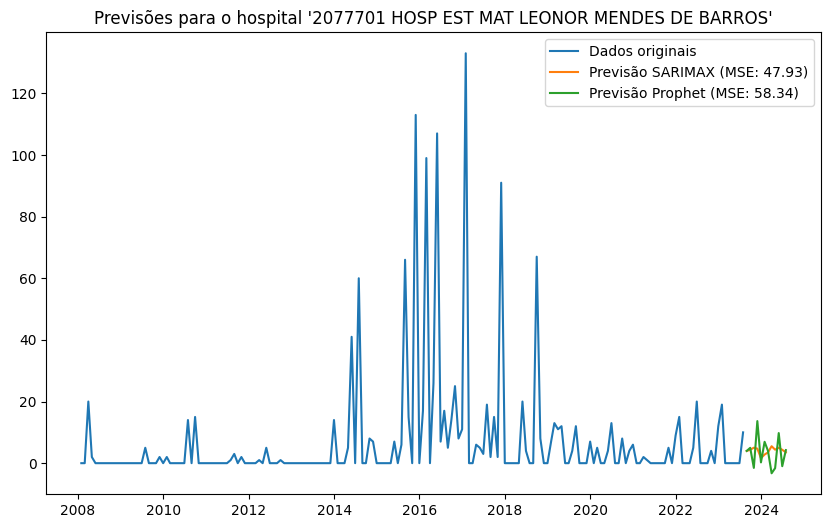

Previsão para o hospital '2066092 HOSP EST PEDREIRA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2769.038, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2765.570, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2766.227, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3174.122, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2763.896, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2765.326, Time=0.10 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2765.460, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2766.100, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2764.896, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2766.643, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=2847.222, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 3.757 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:24:41 - cmdstanpy - INFO - Chain [1] start processing
22:24:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 288389.9191520172
MSE do modelo Prophet: 102066.3549773796
O modelo Prophet é o melhor para este hospital.


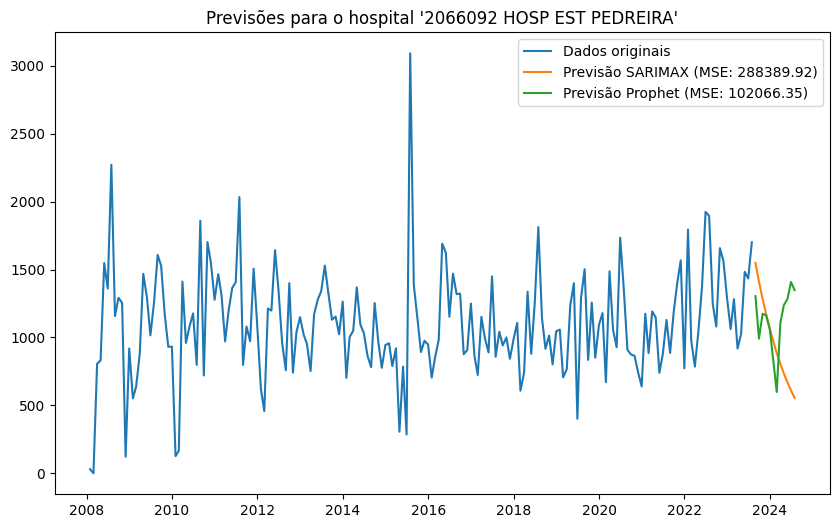

Previsão para o hospital '2091313 HOSP EST REGIONAL SUL':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2596.121, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2557.539, Time=0.75 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2564.908, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2933.023, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2577.715, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2548.858, Time=2.05 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2554.339, Time=1.53 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=2555.197, Time=1.68 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2551.498, Time=2.24 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=2555.165, Time=1.52 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=2548.629, Time=0.86 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2556.631, Time=0.31 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=2555.612, Time=1.49 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:25:02 - cmdstanpy - INFO - Chain [1] start processing
22:25:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 14150.511569446142
MSE do modelo Prophet: 39105.564558071004
O modelo SARIMAX é o melhor para este hospital.


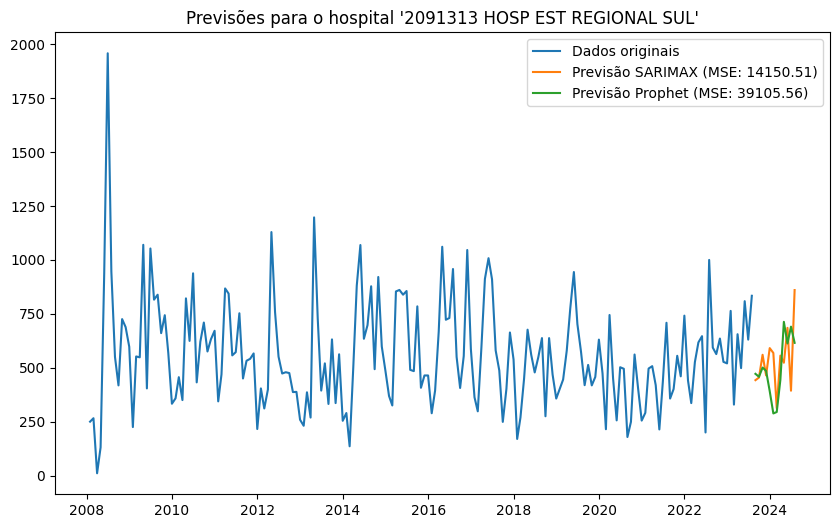

Previsão para o hospital '2077493 HOSP EST SAO MATEUS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2627.905, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2689.427, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2656.353, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2630.745, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2687.482, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2631.294, Time=0.55 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2630.370, Time=1.66 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2628.604, Time=2.48 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2628.482, Time=2.50 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2630.071, Time=0.38 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2628.112, Time=2.92 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2626.882, Time=3.29 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2625.993, Time=1.54 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2629.939, Time=0.40 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=2627.531, Time=2.20

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:25:45 - cmdstanpy - INFO - Chain [1] start processing
22:25:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 11798.967569780341
MSE do modelo Prophet: 17253.652442101677
O modelo SARIMAX é o melhor para este hospital.


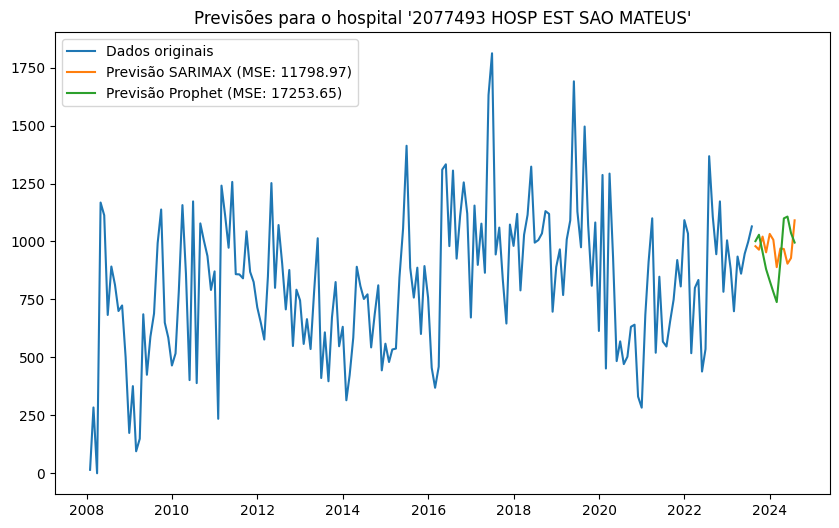

Previsão para o hospital '2091585 HOSP EST SAPOPEMBA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2511.753, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2621.207, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2570.071, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2513.381, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2619.212, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2514.434, Time=0.37 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2514.048, Time=0.65 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2514.092, Time=0.36 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2515.127, Time=1.88 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2514.594, Time=2.11 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(3,1,2)(1,0,1)

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:26:53 - cmdstanpy - INFO - Chain [1] start processing
22:26:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 2408.6733657535447
MSE do modelo Prophet: 9541.758478209604
O modelo SARIMAX é o melhor para este hospital.


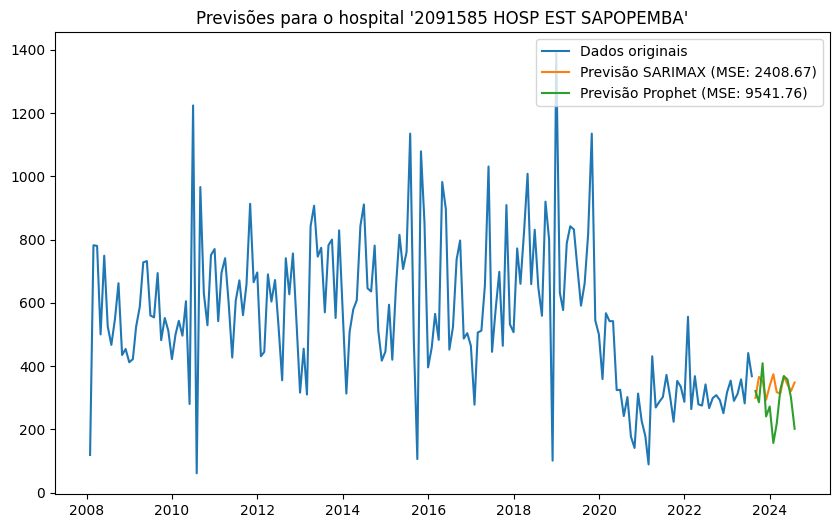

Previsão para o hospital '2082225 HOSP EST TAIPAS - KATIA DE S RODRIGUES':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2733.505, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2690.220, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2687.950, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2731.512, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2686.646, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2687.010, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2676.630, Time=0.69 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2670.291, Time=1.16 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2668.295, Time=1.07 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2732.632, Time=0.15 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2665.928, Time=2.24 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=2668.388, Time=1.98 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,1

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:27:30 - cmdstanpy - INFO - Chain [1] start processing
22:27:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\p

MSE do modelo SARIMAX: 14836.471976517356
MSE do modelo Prophet: 26009.932107942106
O modelo SARIMAX é o melhor para este hospital.


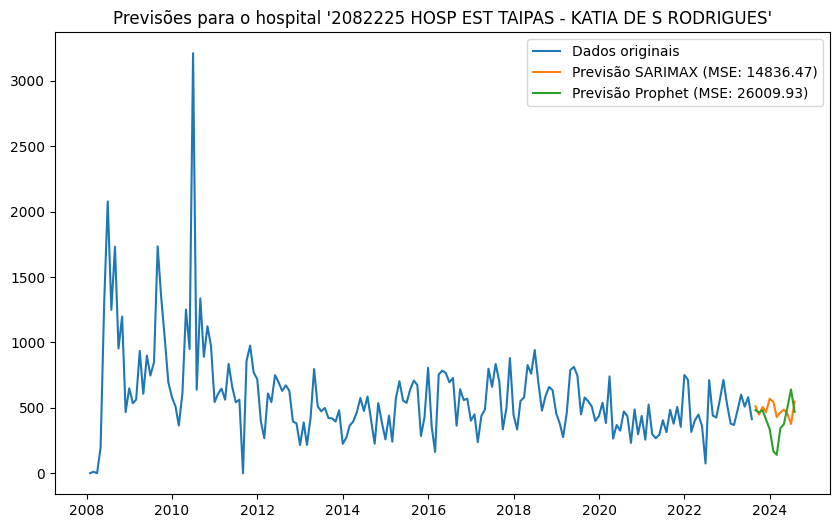

Previsão para o hospital '2088576 HOSP EST TRANSPLANT EURYCLIDES DE JESUS ZERBINI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2231.502, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2166.138, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2119.896, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2229.502, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2118.342, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2119.944, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2121.625, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2118.870, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2118.960, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2164.169, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2120.755, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2118.430, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 3.565 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:27:35 - cmdstanpy - INFO - Chain [1] start processing
22:27:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1166.6498916816643
MSE do modelo Prophet: 692.1767191605031
O modelo Prophet é o melhor para este hospital.


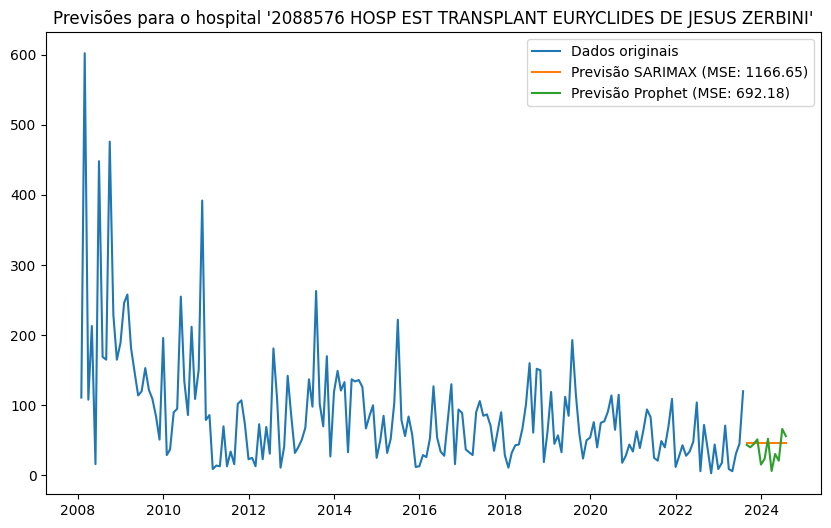

Previsão para o hospital '2077426 HOSP EST VL ALPINA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2723.009, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2676.129, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2645.875, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2721.022, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2657.745, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2639.121, Time=0.50 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2640.957, Time=0.31 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2640.973, Time=1.22 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2640.221, Time=1.86 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2639.630, Time=1.05 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2638.509, Time=1.20 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2714.594, Time=0.94 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2636.725, Time=1.65 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2639.562, Time=0.53 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:28:27 - cmdstanpy - INFO - Chain [1] start processing
22:28:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 19218.181432718713
MSE do modelo Prophet: 60294.36043030265
O modelo SARIMAX é o melhor para este hospital.


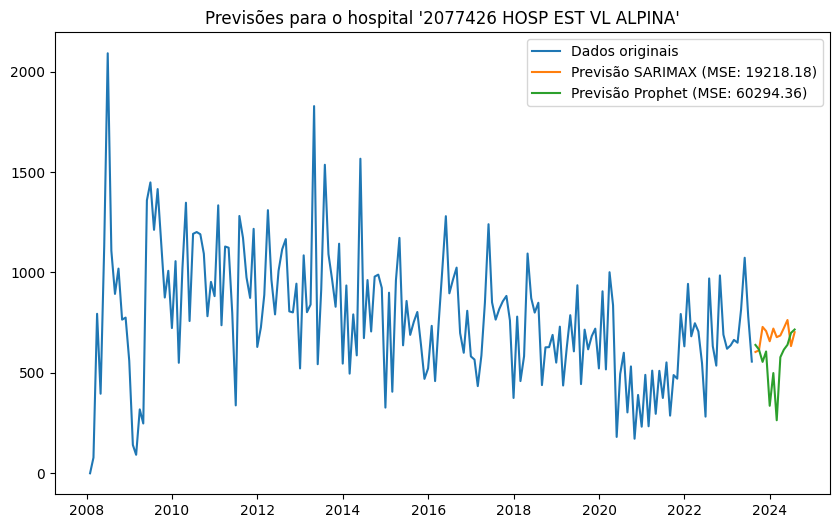

Previsão para o hospital '2688573 HOSP EST VL NOVA CACHOEIRINHA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2627.102, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2696.327, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2660.143, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2649.847, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2694.355, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2631.723, Time=2.52 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=2633.092, Time=3.84 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2623.210, Time=0.93 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,2)(1,0,0)[12] inter

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:29:45 - cmdstanpy - INFO - Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 10170.343810138618
MSE do modelo Prophet: 26264.674498134893
O modelo SARIMAX é o melhor para este hospital.


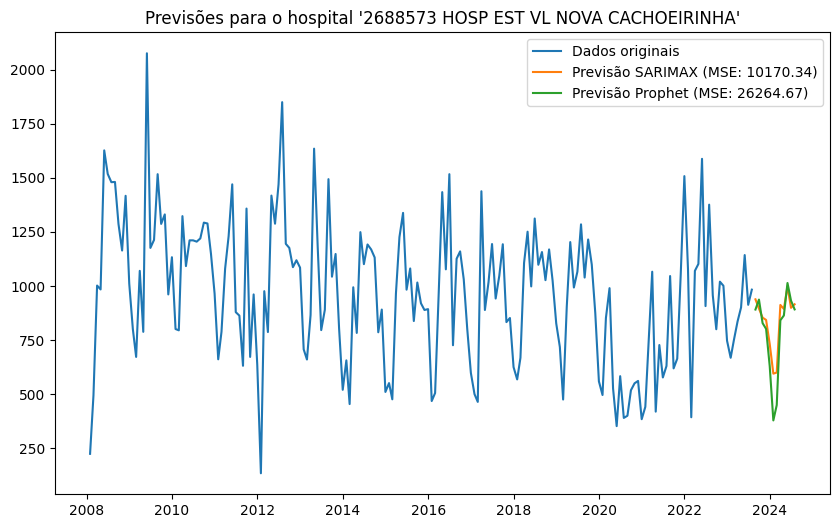

Previsão para o hospital '2091755 HOSP EST VL PENTEADO - DR JOSE PANGELLA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2543.450, Time=1.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2564.204, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2538.773, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2545.448, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2903.377, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2537.408, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2538.407, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2540.407, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2536.170, Time=0.08 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2537.585, Time=0.20 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2537.265, Time=0.09 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2539.249, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2538.089, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2538.096, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2537.765, Time=0.04

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:29:49 - cmdstanpy - INFO - Chain [1] start processing
22:29:49 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 42609.73171778133
MSE do modelo Prophet: 55121.01646464988
O modelo SARIMAX é o melhor para este hospital.


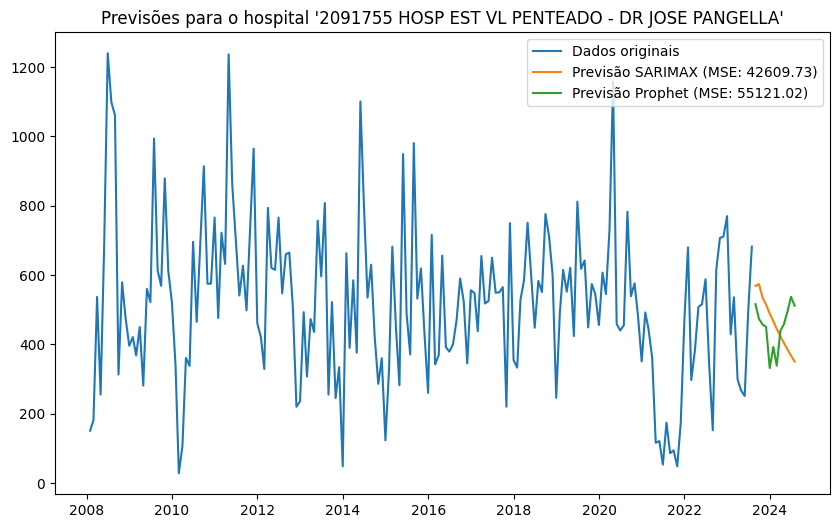

Previsão para o hospital '2077752 HOSP MONUMENTO-CEHM':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1123.668, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1031.644, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=987.850, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1121.670, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=985.909, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=987.849, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=979.334, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=981.283, Time=0.21 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=981.281, Time=0.20 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1029.746, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=980.436, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=980.693, Time=0.15 sec
 ARIMA(0,1,2)(0,0,

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:29:54 - cmdstanpy - INFO - Chain [1] start processing
22:29:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 9.650567617156823e-07
MSE do modelo Prophet: 2.5240873727278292
O modelo SARIMAX é o melhor para este hospital.


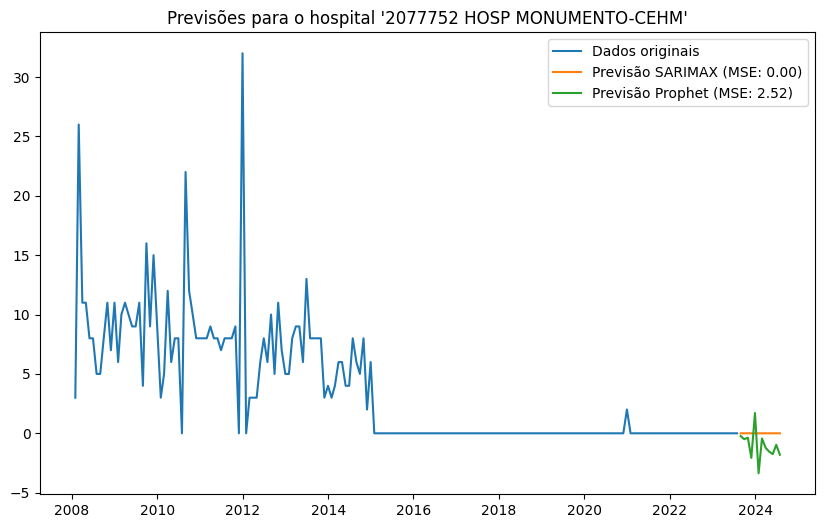

Previsão para o hospital '2752077 HOSP DO SERV PUB MUNICIPAL - HSPM':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2206.105, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2300.551, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2247.114, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2200.922, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2298.551, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2199.564, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2200.860, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2202.794, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2200.739, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2200.590, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2247.947, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2201.444, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2197.564, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2198.860, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2198.923, Time=0.20

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:29:59 - cmdstanpy - INFO - Chain [1] start processing
22:29:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 2.097344026013548
MSE do modelo Prophet: 1047.5365841020152
O modelo SARIMAX é o melhor para este hospital.


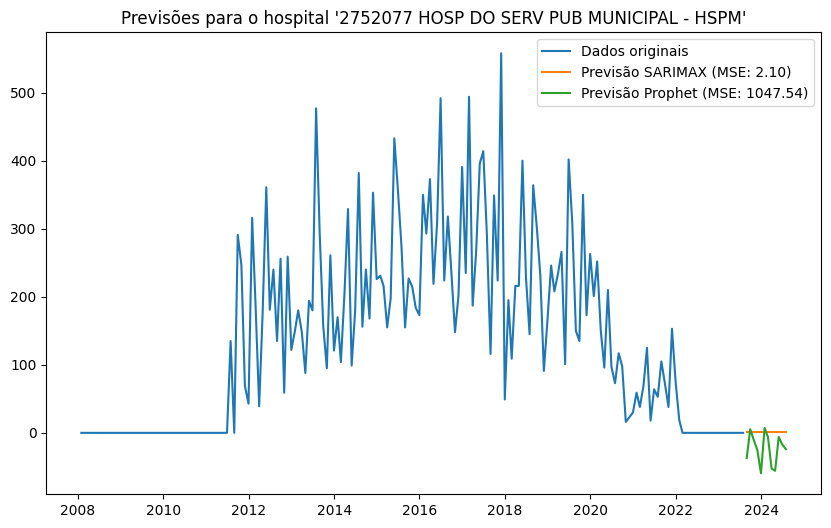

Previsão para o hospital '2084473 HOSP MUN IGNACIO PROENCA DE GOUVEA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2441.494, Time=1.97 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2439.601, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2441.688, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2442.061, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2758.496, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2441.488, Time=0.20 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=2441.460, Time=0.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2443.461, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2439.718, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2440.217, Time=0.08 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:30:02 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2440.096, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 3.225 seconds


22:30:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 185701.33333333334
MSE do modelo Prophet: 23114.120513139776
O modelo Prophet é o melhor para este hospital.


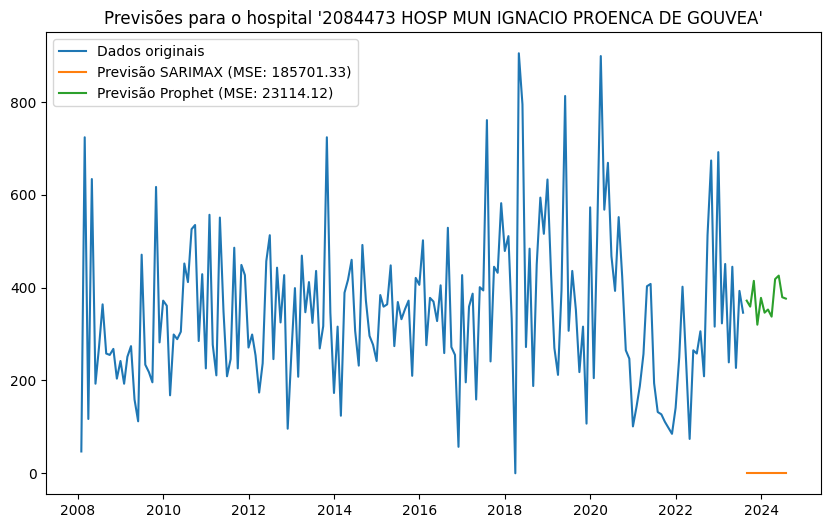

Previsão para o hospital '2084139 HOSP MUN BENEDICTO MONTENEGRO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2168.142, Time=1.62 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2178.194, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2165.714, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2169.699, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2486.387, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2164.636, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2165.873, Time=0.08 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2167.810, Time=1.48 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2161.569, Time=0.13 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2162.560, Time=0.96 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2162.723, Time=1.90 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2164.655, Time=0.95 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2163.432, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2163.522, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2161.996, Time=0.37

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:30:13 - cmdstanpy - INFO - Chain [1] start processing
22:30:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 4813.238300396082
MSE do modelo Prophet: 3967.033219176423
O modelo Prophet é o melhor para este hospital.


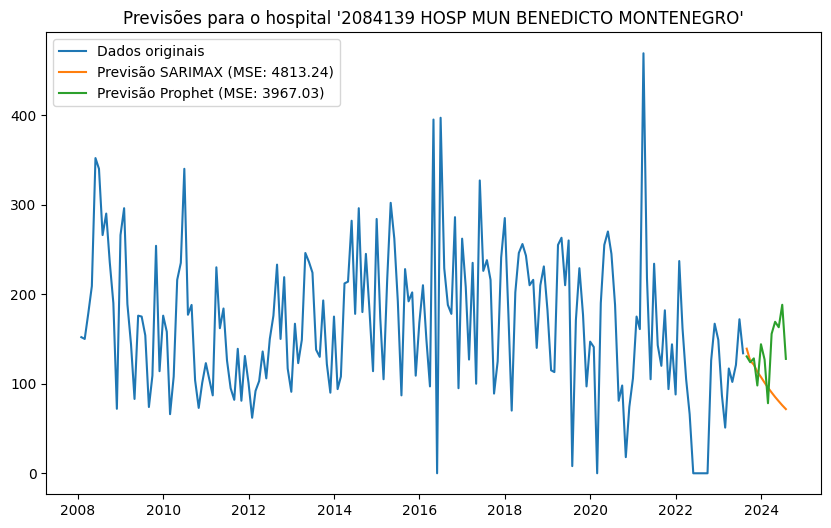

Previsão para o hospital '0102105 HOSP MUN BRASILANDIA - ADIB JATENE':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2264.557, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2244.964, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2252.402, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2242.964, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2244.964, Time=0.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=2246.966, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=2236.478, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2238.478, Time=0.09 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=2238.478, Time=0.09 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=2240.478, Time=0.55 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=2235.255, Time=0.15 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2237.255, Time=0.31 sec
 ARIMA(3,1,0)(0,1,1)[12]             : AIC=2237.255, Time=0.33 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=2239.255, Time=0.41 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:30:52 - cmdstanpy - INFO - Chain [1] start processing
22:30:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 3492233.453418314
MSE do modelo Prophet: 627286.6508568173
O modelo Prophet é o melhor para este hospital.


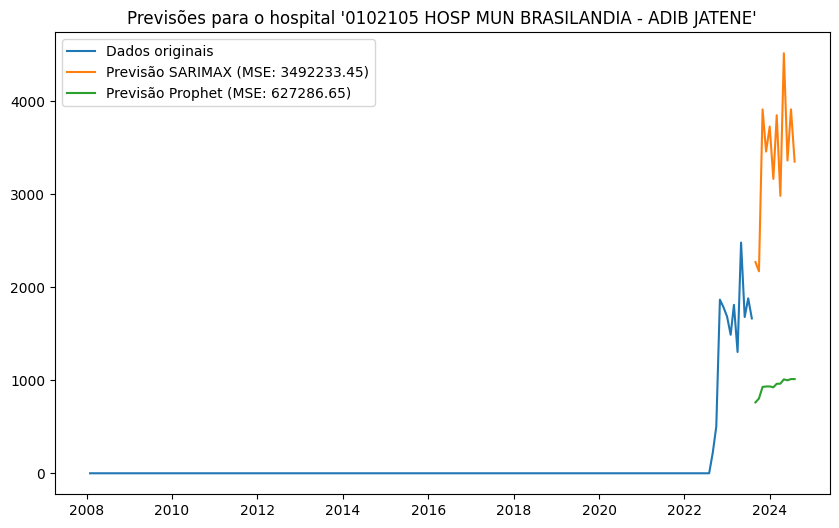

Previsão para o hospital '0158100 HOSP MUN BRIGADEIRO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2009.495, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2027.199, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2019.164, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2012.974, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2025.275, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2007.220, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2006.583, Time=0.31 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2007.327, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2005.413, Time=0.13 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2006.420, Time=0.36 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=2006.345, Time=0.42 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2008.401, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2011.979, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2003.800, Time=0.08 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:31:03 - cmdstanpy - INFO - Chain [1] start processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 94479.22591815366
MSE do modelo Prophet: 64619.423003763404
O modelo Prophet é o melhor para este hospital.


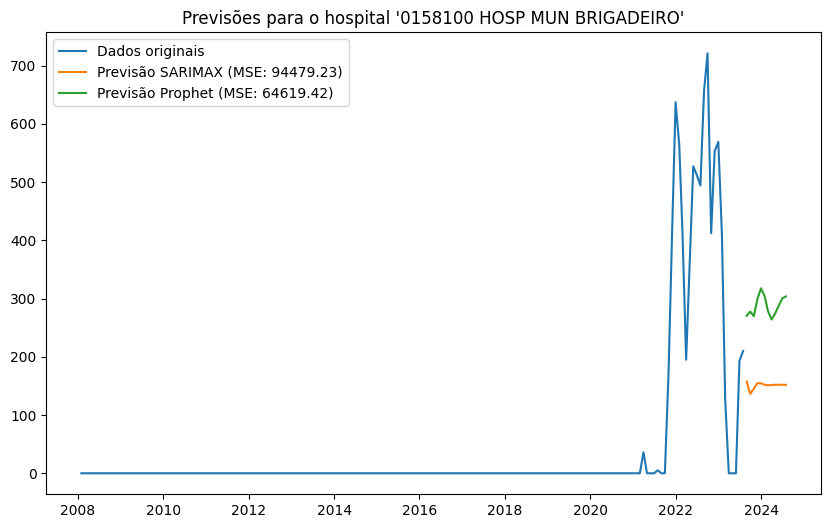

Previsão para o hospital '2079186 HOSP MUN CACHOEIRINHA-MARIO DE M A SILVA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1540.915, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1544.419, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1544.438, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1557.108, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1542.510, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1542.502, Time=0.20 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1542.761, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1542.805, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1537.285, Time=0.22 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1539.110, Time=0.37 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1539.110, Time=0.46 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1532.397, Time=0.16 sec
 ARIMA(2,0

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:31:19 - cmdstanpy - INFO - Chain [1] start processing
22:31:19 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 60.05544911243734
MSE do modelo Prophet: 142.74216352195978
O modelo SARIMAX é o melhor para este hospital.


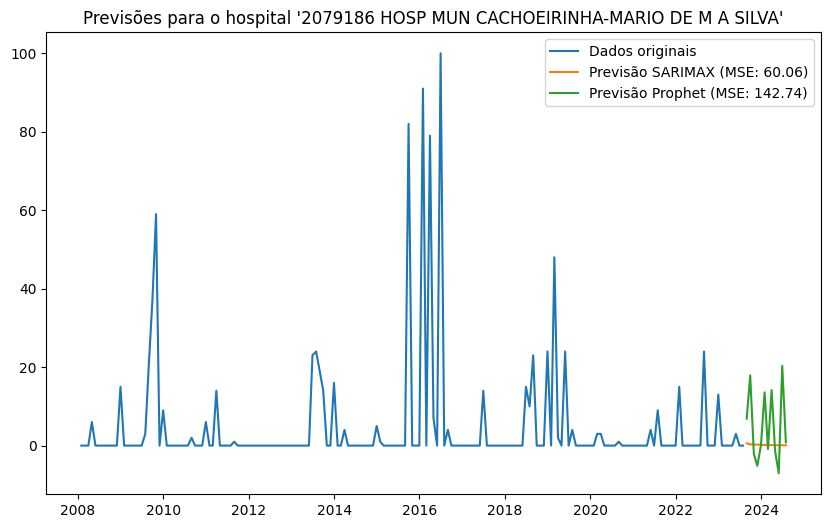

Previsão para o hospital '2786680 HOSP MUN CAMPO LIMPO - FERNANDO M P DA ROCHA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2806.761, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2764.937, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2747.075, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2804.776, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2750.626, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2728.553, Time=0.50 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2744.525, Time=0.23 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2728.888, Time=1.97 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2728.875, Time=1.83 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2742.220, Time=0.30 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2735.770, Time=0.83 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=2730.862, Time=2.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2729.382, Time=0.71 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:31:42 - cmdstanpy - INFO - Chain [1] start processing
22:31:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 36931.9661820355
MSE do modelo Prophet: 170210.1379948051
O modelo SARIMAX é o melhor para este hospital.


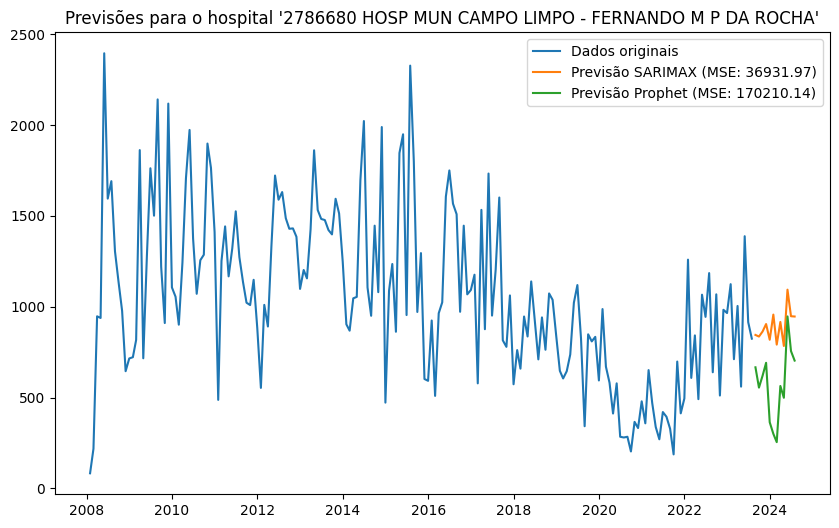

Previsão para o hospital '7992890 HOSP MUN CAPELA DO SOCORRO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1845.465, Time=0.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1917.737, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1861.669, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1855.744, Time=0.21 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1843.465, Time=0.68 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1841.483, Time=0.30 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1843.465, Time=1.05 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1839.695, Time=0.66 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1841.692, Time=0.66 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1841.692, Time=0.51 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1843.692, Time=0.61 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1849.810, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1850.767, Time=0.09 sec
 ARIMA(1,1,3)(0,1,0)[12]             : AIC=1843.168, Time=0.48 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1853.744, Time=0.05

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:31:50 - cmdstanpy - INFO - Chain [1] start processing
22:31:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\p

MSE do modelo SARIMAX: 240891.03170396062
MSE do modelo Prophet: 36875.06282619555
O modelo Prophet é o melhor para este hospital.


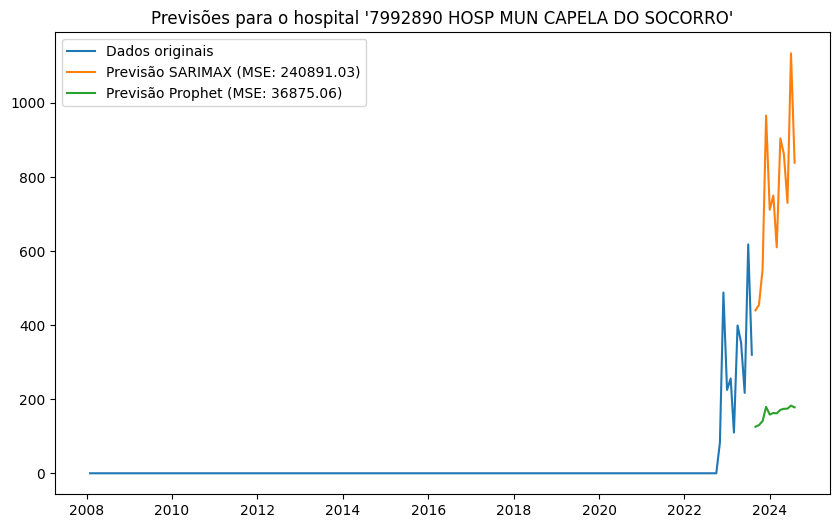

Previsão para o hospital '5420938 HOSP MUN CIDADE TIRADENTES-CARMEN PRUDENTE':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2659.611, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2783.722, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2715.298, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2671.393, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2781.766, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2669.701, Time=0.92 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2668.640, Time=1.03 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=3.59 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2674.958, Time=0.44 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2671.380, Time=5.31 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2669.018, Time=2.16 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2662.144, Time=1.05 sec
 ARIMA(3,1,2)(1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:32:41 - cmdstanpy - INFO - Chain [1] start processing
22:32:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 33321.50619468182
MSE do modelo Prophet: 112971.04943097984
O modelo SARIMAX é o melhor para este hospital.


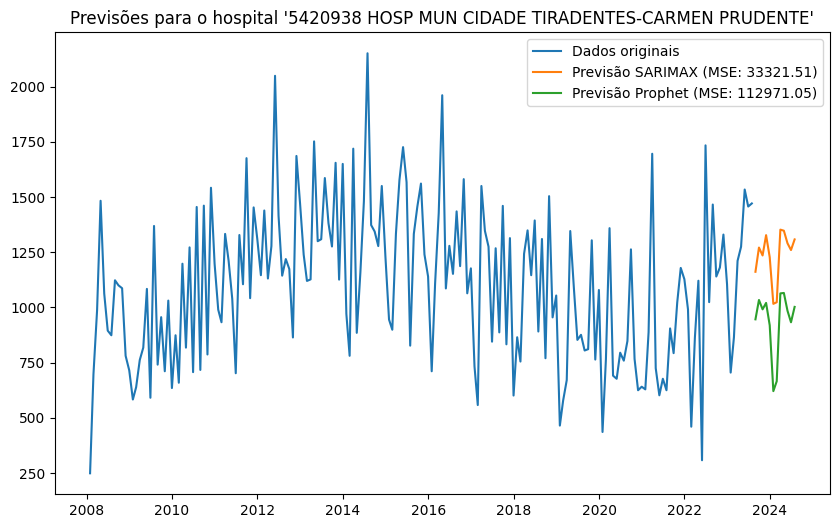

Previsão para o hospital '0102075 HOSP MUN DA BELA VISTA - SANTA DULCE DOS POBRES':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2537.189, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2447.620, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2432.445, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2535.212, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2430.813, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2432.500, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2430.008, Time=0.14 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2431.489, Time=0.41 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2431.361, Time=0.49 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2432.637, Time=0.76 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2447.671, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2425.535, Time=0.21 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2427.427, Time=0.65 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:33:01 - cmdstanpy - INFO - Chain [1] start processing
22:33:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 142741.94386876168
MSE do modelo Prophet: 183302.97351123122
O modelo SARIMAX é o melhor para este hospital.


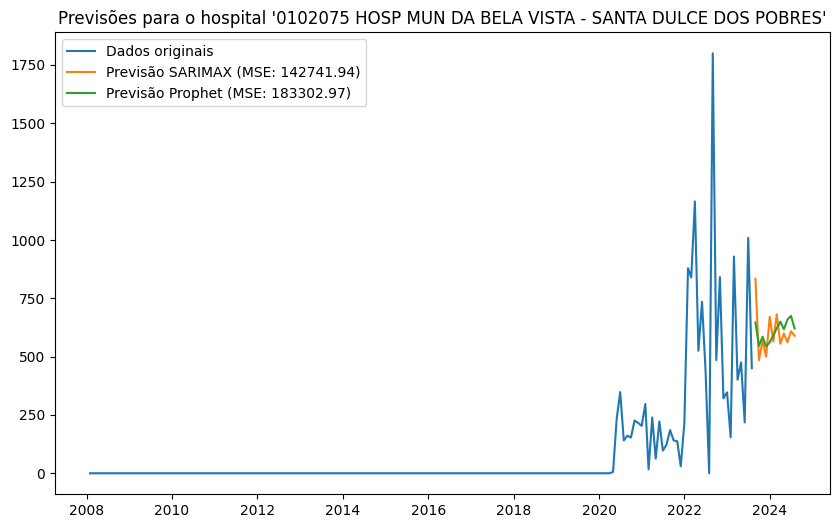

Previsão para o hospital '2082829 HOSP MUN ERMELINO MATARAZZO - ALIPIO CORREA NETTO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2580.638, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2686.007, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2591.367, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2630.837, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3063.355, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2578.709, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2577.854, Time=0.15 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=2578.893, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=2576.175, Time=0.29 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=2577.123, Time=0.74 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=2579.582, Time=0.13 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=2579.850, Time=0.57 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=2612.407, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2574.664, Time=0.20 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=2575.664, Time=0.64

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:33:09 - cmdstanpy - INFO - Chain [1] start processing
22:33:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 26536.45357777797
MSE do modelo Prophet: 39746.041570373585
O modelo SARIMAX é o melhor para este hospital.


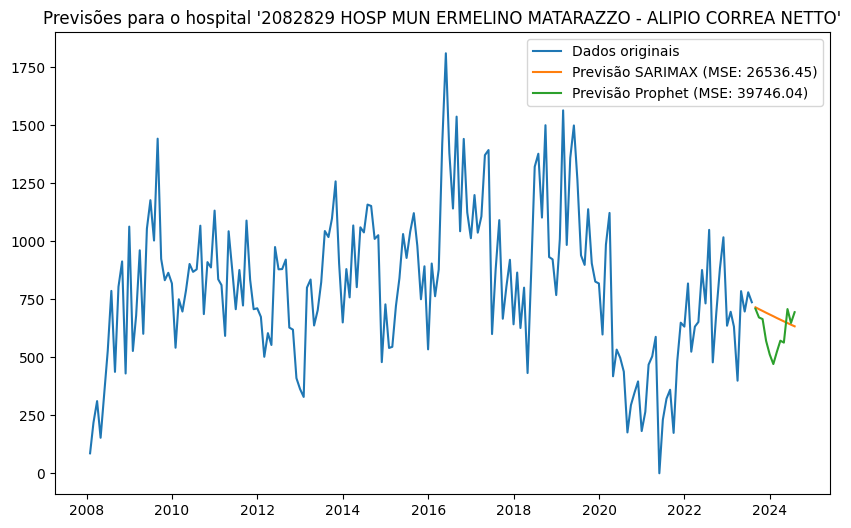

Previsão para o hospital '7711980 HOSP MUN GILSON DE CASSIA M DE CARVALHO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2265.091, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2306.705, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2279.623, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2260.334, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2304.772, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2258.444, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2260.355, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2261.832, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2258.110, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2260.057, Time=0.36 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2260.047, Time=0.35 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2261.689, Time=1.55 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2277.929, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2260.091, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2260.103, Time=0.22

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:33:17 - cmdstanpy - INFO - Chain [1] start processing
22:33:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 15188.750181535217
MSE do modelo Prophet: 11041.19191902435
O modelo Prophet é o melhor para este hospital.


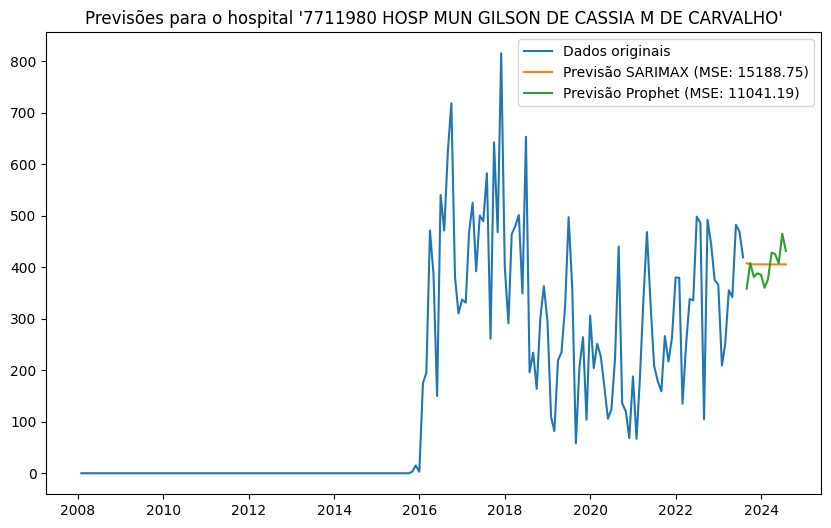

Previsão para o hospital '0161438 HOSP MUN GUARAPIRANGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2510.861, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2580.292, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2534.256, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2503.114, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2578.388, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2501.553, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2503.126, Time=0.27 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2505.046, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2503.502, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2503.503, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2533.796, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2505.506, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2500.880, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2502.287, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2502.277, Time=0.17

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:33:22 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=2504.856, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 4.344 seconds


22:33:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 100766.85350919311
MSE do modelo Prophet: 115454.42050716623
O modelo SARIMAX é o melhor para este hospital.


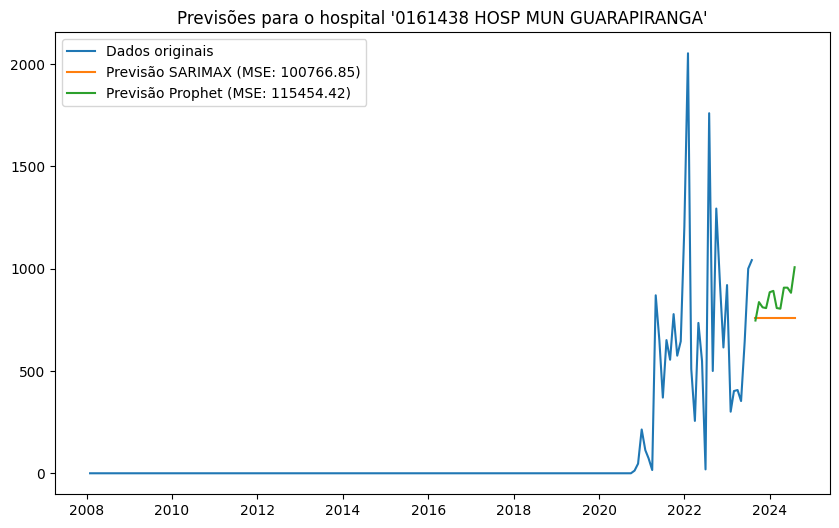

Previsão para o hospital '2078325 HOSP MUN INF MENINO JESUS':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2611.164, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2581.664, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2546.976, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2609.204, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2565.889, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2547.792, Time=0.53 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2548.300, Time=0.77 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2549.583, Time=0.21 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2595.991, Time=0.11 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2575.391, Time=0.32 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:33:45 - cmdstanpy - INFO - Chain [1] start processing
22:33:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 48920.081912080095
MSE do modelo Prophet: 20243.375303076366
O modelo Prophet é o melhor para este hospital.


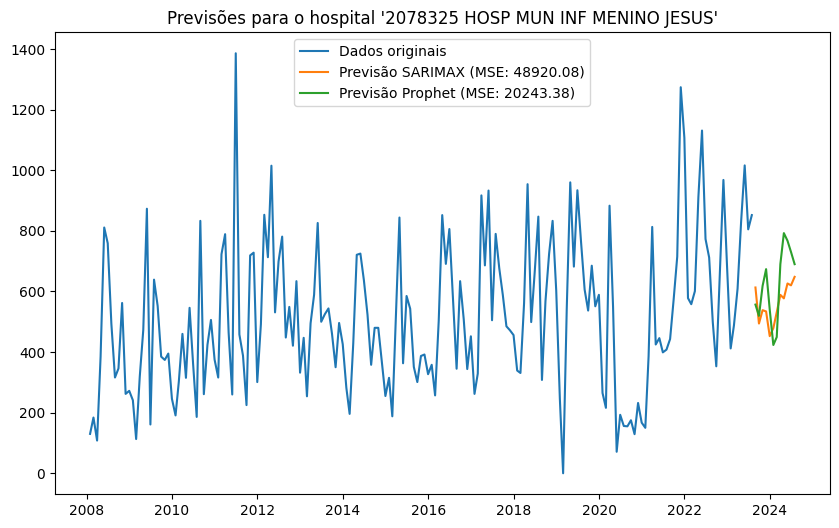

Previsão para o hospital '2077639 HOSP MUN ITAQUERA - WALDOMIRO DE PAULA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2531.904, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2622.630, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2579.187, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2528.090, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2620.631, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2533.964, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2527.041, Time=0.42 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2527.569, Time=0.23 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2530.089, Time=0.77 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2529.008, Time=0.83 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2620.333, Time=0.31 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2528.211, Time=0.75 sec
 ARIMA(0,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:34:04 - cmdstanpy - INFO - Chain [1] start processing
22:34:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 16786.15823357148
MSE do modelo Prophet: 16180.799999611985
O modelo Prophet é o melhor para este hospital.


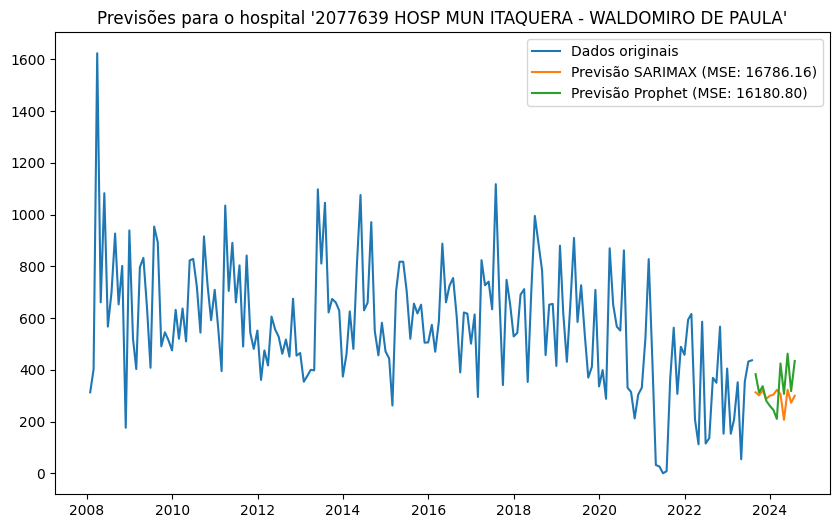

Previsão para o hospital '2081970 HOSP MUN JABAQUARA - ARTUR RIBEIRO DE SABOYA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2642.944, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2569.516, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2546.169, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2640.990, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2562.922, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2541.277, Time=0.43 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2545.010, Time=0.24 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2541.534, Time=1.85 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2548.135, Time=0.60 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2546.545, Time=0.62 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2633.357, Time=0.23 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2541.967, Time=0.74 sec
 ARIMA(0,1

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:34:34 - cmdstanpy - INFO - Chain [1] start processing
22:34:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 12054.434547319624
MSE do modelo Prophet: 27539.997411324814
O modelo SARIMAX é o melhor para este hospital.


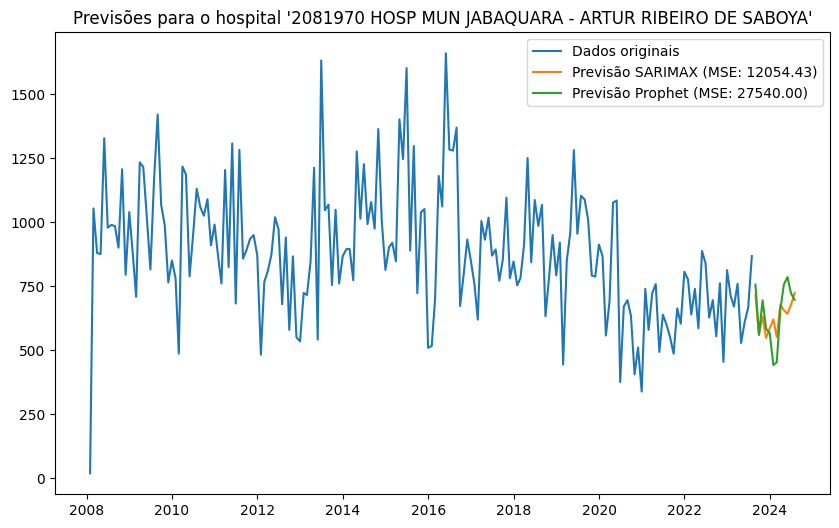

Previsão para o hospital '9465464 HOSP MUN JOSANIAS CASTANHA BRAGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2256.328, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2271.827, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2270.421, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2262.190, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2270.778, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2255.438, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2253.522, Time=0.28 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2255.398, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2250.088, Time=0.21 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2251.854, Time=0.41 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2251.929, Time=0.48 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2252.861, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2251.385, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2256.610, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=2250.009, Time=0.30

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:34:51 - cmdstanpy - INFO - Chain [1] start processing
22:34:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 86890.83290649028
MSE do modelo Prophet: 29837.60724696158
O modelo Prophet é o melhor para este hospital.


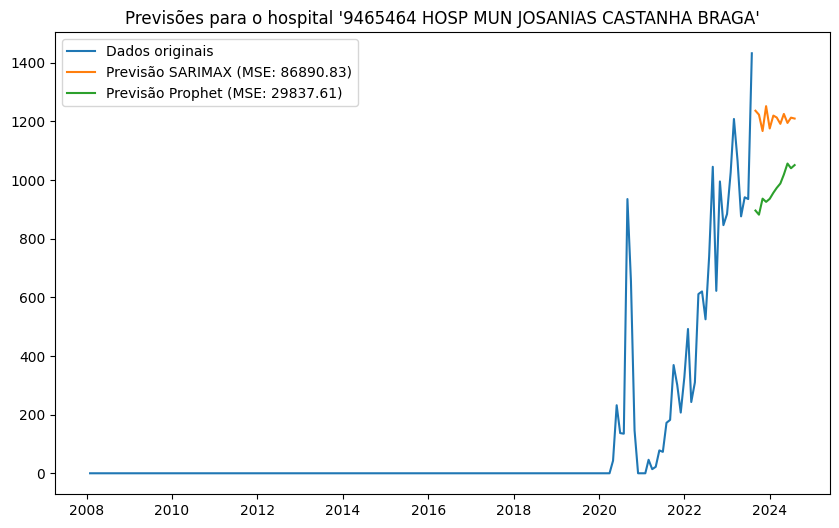

Previsão para o hospital '5718368 HOSP MUN M BOI MIRIM':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2646.967, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2630.411, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2627.163, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2645.054, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2630.056, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2626.417, Time=0.46 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2627.480, Time=0.17 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2628.768, Time=0.50 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2629.427, Time=0.66 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,2)(1,0,1)[12] 

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:35:21 - cmdstanpy - INFO - Chain [1] start processing
22:35:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 55605.03023815572
MSE do modelo Prophet: 75834.66235923972
O modelo SARIMAX é o melhor para este hospital.


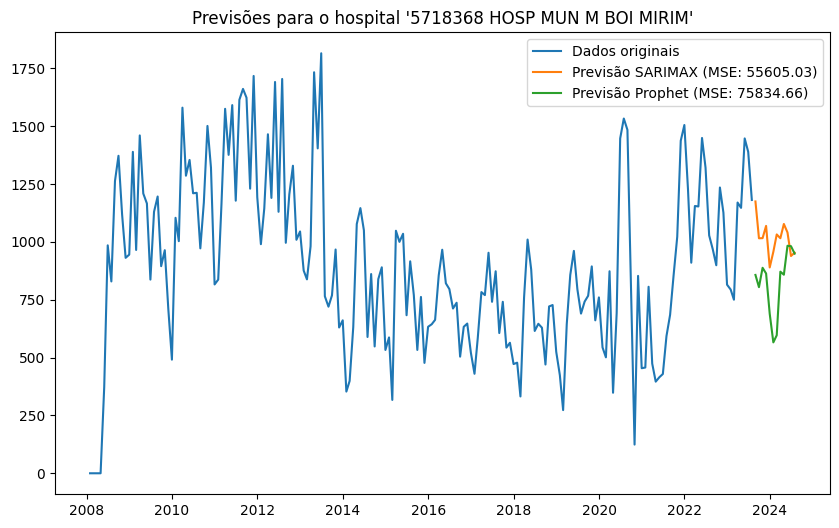

Previsão para o hospital '2075717 HOSP MUN MARIO DEGNI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2316.043, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2244.798, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2194.534, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2314.044, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2192.739, Time=0.21 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2194.553, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2193.550, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2193.756, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2243.824, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2195.258, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2191.051, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2192.854, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2192.834, Time=0.16 sec
 ARIM

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:35:26 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=2193.478, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 4.367 seconds


22:35:26 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 383.50947714126977
MSE do modelo Prophet: 658.8616050793803
O modelo SARIMAX é o melhor para este hospital.


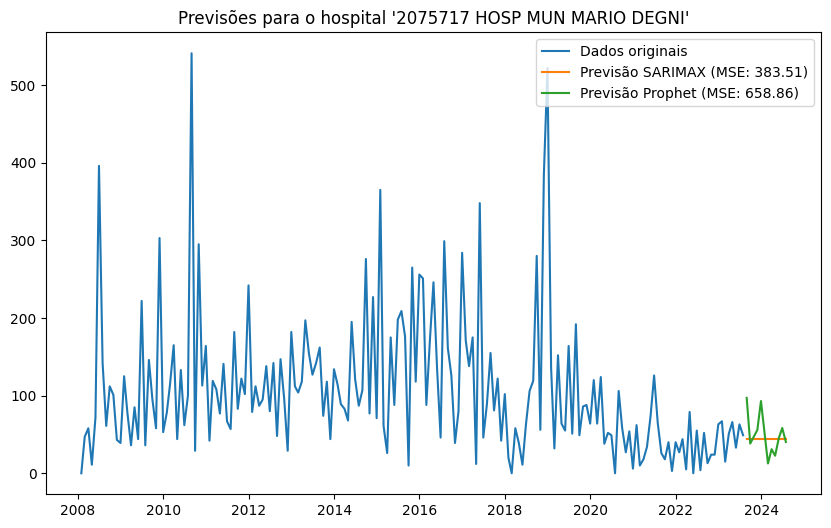

Previsão para o hospital '2077450 HOSP MUN PIRITUBA-JOSE SOARES HUNGRIA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2600.011, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2560.961, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2538.268, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2598.016, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2545.699, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2540.151, Time=0.76 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2537.860, Time=0.23 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2539.737, Time=0.70 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2599.981, Time=0.12 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2537.560, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2541.974, Time=0.12 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2539.525, Time=1.01 sec
 ARIMA(1,1

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:36:06 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 5126.567184452935
MSE do modelo Prophet: 5016.690423605378
O modelo Prophet é o melhor para este hospital.


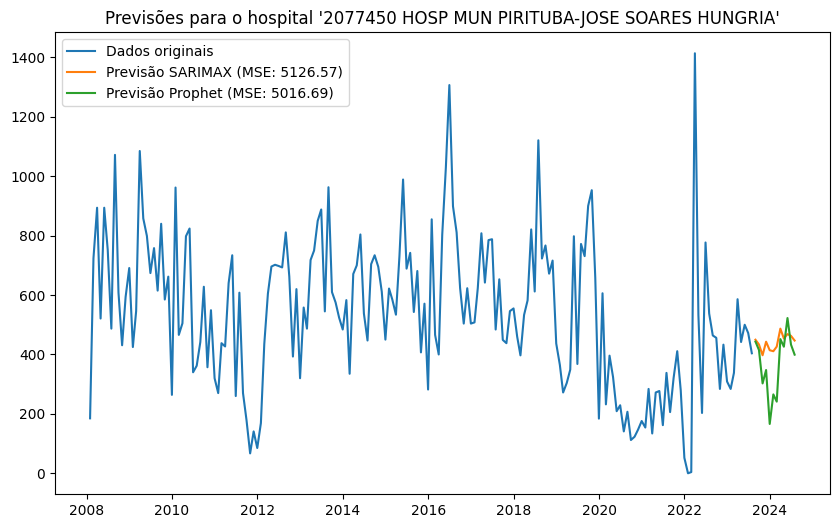

Previsão para o hospital '6998194 HOSP MUN SOROCABANA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1885.972, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1915.774, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1886.660, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1882.779, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1914.199, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1886.179, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1884.744, Time=0.35 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1884.749, Time=0.45 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1882.843, Time=0.19 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1886.742, Time=0.91 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1913.705, Time=0.09 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1884.745, Time=0.55 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1884.751, Time=0.29 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1886.616, Time=0.13 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1883.213, Time=0.34

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:36:16 - cmdstanpy - INFO - Chain [1] start processing
22:36:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 23297.981999323147
MSE do modelo Prophet: 13804.245146223562
O modelo Prophet é o melhor para este hospital.


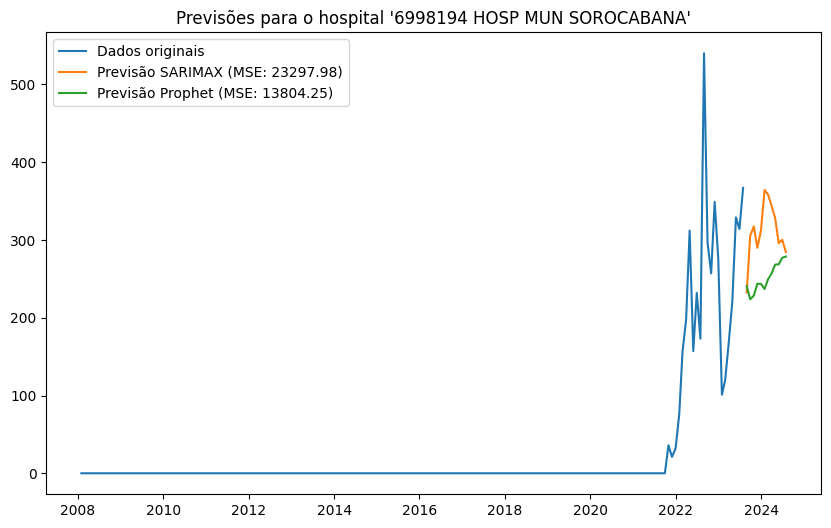

Previsão para o hospital '2080346 HOSP MUN TATUAPE - CARMINO CARICCHIO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2777.187, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2744.024, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2740.063, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2775.225, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2740.792, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2732.830, Time=0.90 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=2768.069, Time=0.44 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=2720.645, Time=1.71 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2728.070, Time=0.61 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=2719.069, Time=1.96 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=2722.659, Time=2.38 sec
 ARIMA(1,1,1)(2

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_ra

MSE do modelo SARIMAX: 89271.95541333542
MSE do modelo Prophet: 86558.77893113479
O modelo Prophet é o melhor para este hospital.


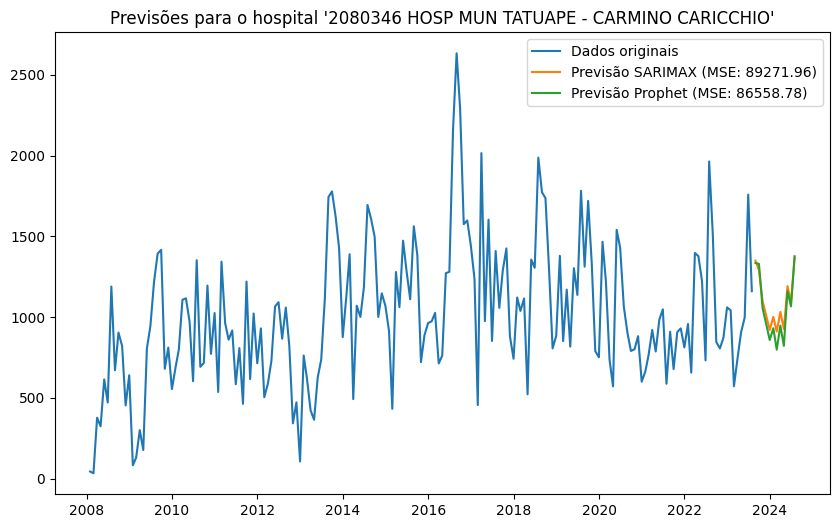

Previsão para o hospital '2080583 HOSP MUN TIDE SETUBAL':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2626.279, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2614.974, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2619.293, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2976.206, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2613.051, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2614.974, Time=0.06 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2616.959, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2605.533, Time=0.04 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2606.892, Time=0.23 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2607.021, Time=0.09 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2608.889, Time=0.67 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2600.688, Time=0.05 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=2602.608, Time=0.33 sec
 ARIMA(3,0,0)(0,0,1)[12] intercept   : AIC=2602.645, Time=0.13 sec


c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:37:21 - cmdstanpy - INFO - Chain [1] start processing
22:37:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 215719.03721924697
MSE do modelo Prophet: 441763.8984167331
O modelo SARIMAX é o melhor para este hospital.


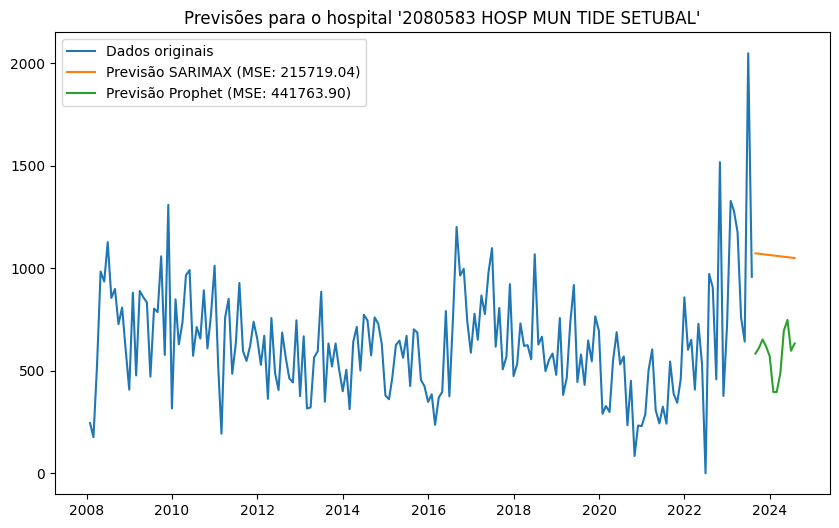

Previsão para o hospital '3212130 HOSP MUN VL MARIA - VER JOSE STOROPOLLI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2537.118, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2610.826, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2578.329, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2547.251, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2608.844, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2546.783, Time=0.43 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2546.204, Time=0.49 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2537.824, Time=2.37 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2537.804, Time=2.23 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2546.493, Time=0.31 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2544.457, Time=1.82 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2542.411, Time=1.75 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=2540.354, Time=2.29 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2533.860, Time=0.87 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.69 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:38:14 - cmdstanpy - INFO - Chain [1] start processing
22:38:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 11332.469554847308
MSE do modelo Prophet: 18646.703682051844
O modelo SARIMAX é o melhor para este hospital.


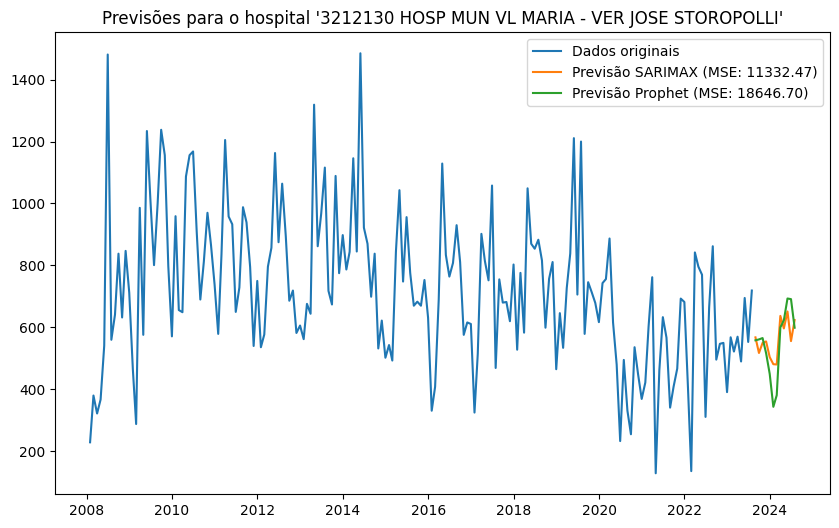

Previsão para o hospital '2080788 HOSP MUN VL NHOCUNE-ALEXANDRE ZAIO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2242.959, Time=1.94 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2324.272, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2281.354, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2256.467, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2322.302, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2245.057, Time=2.12 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.14 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2242.311, Time=0.77 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept 

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_ra

MSE do modelo SARIMAX: 9370.93689881604
MSE do modelo Prophet: 12049.102780109895
O modelo SARIMAX é o melhor para este hospital.


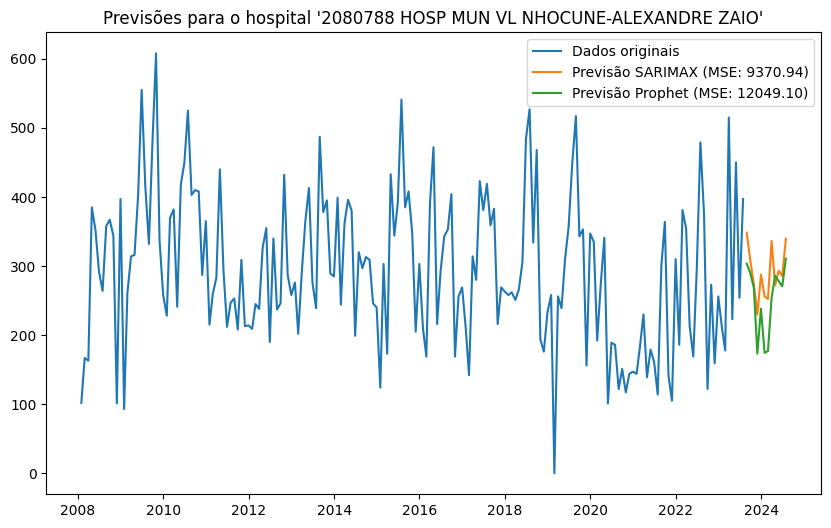

Previsão para o hospital '2091399 HOSP N SRA DO PARI':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=606.720, Time=1.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=596.690, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=600.585, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=600.582, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=598.580, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=598.671, Time=0.35 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=598.671, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=600.670, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=598.607, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=598.604, Time=0.03 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:38:54 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=600.582, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.658 seconds


22:38:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1.25
MSE do modelo Prophet: 0.9086390694601229
O modelo Prophet é o melhor para este hospital.


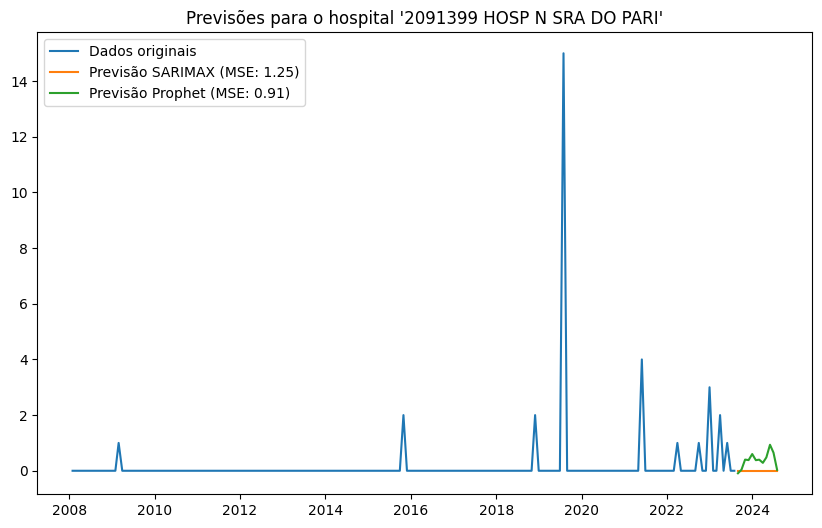

Previsão para o hospital '2089777 HOSP NIPO BRASILEIRO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-195.112, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-188.341, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-184.495, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-184.500, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-186.297, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-197.126, Time=4.02 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-199.050, Time=0.39 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-196.295, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-192.952, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-183.463, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=-199.315, Time=0.34 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=-197.328, Time=0.61 sec
 ARIMA(3,0,2)(0,0,1)[12] intercept   : AIC=-197.328, Time=0.61 sec
 ARIMA(3,0,2)(1,0,1)[12] intercept   : AIC=-195.328, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=-198.970, Time=0.34

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:39:24 - cmdstanpy - INFO - Chain [1] start processing
22:39:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1.0902941222921965e-07
MSE do modelo Prophet: 0.0010901858852029533
O modelo SARIMAX é o melhor para este hospital.


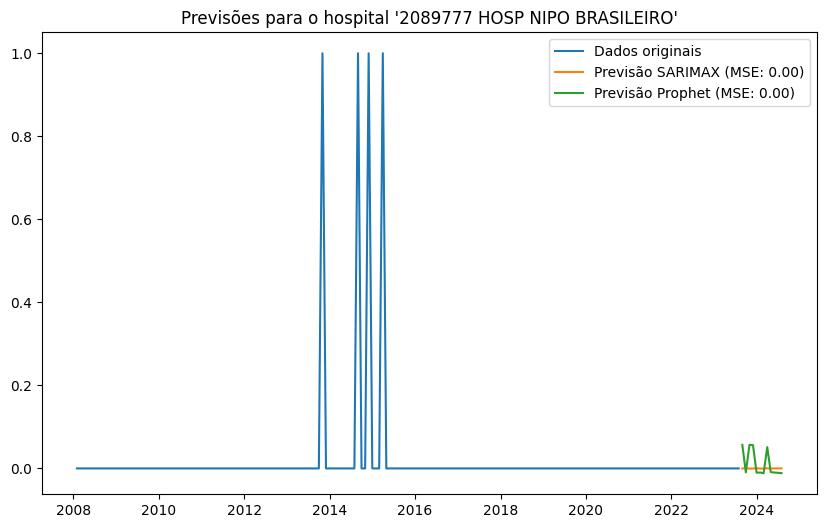

Previsão para o hospital '2077485 HOSP SAO PAULO - UNIDADE I - UNIFESP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2749.702, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2709.803, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2747.704, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2710.390, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2711.801, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2709.644, Time=0.06 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2711.304, Time=0.20 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2707.166, Time=1.14 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(1,1,1)(1,0,2)[12] inter

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:39:52 - cmdstanpy - INFO - Chain [1] start processing
22:39:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 79854.82025366263
MSE do modelo Prophet: 42004.38596600567
O modelo Prophet é o melhor para este hospital.


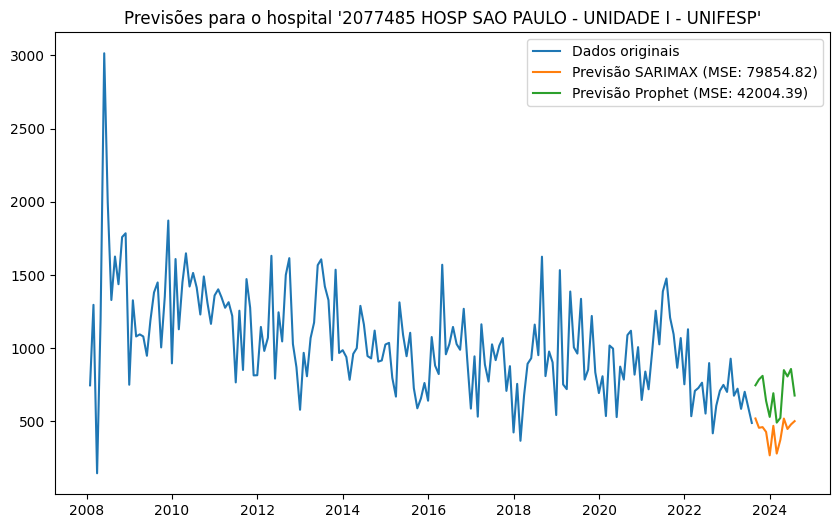

Previsão para o hospital '2058502 HOSP SERV ESTADUAL FCO MORATO DE OLIVEIRA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=526.225, Time=1.86 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=514.754, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=518.743, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=518.743, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=513.757, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=516.748, Time=0.32 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=516.748, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=518.748, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=516.749, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=516.749, Time=0.03 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:39:56 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=518.749, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 2.662 seconds


22:39:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 0.0
MSE do modelo Prophet: 0.2877320914204839
O modelo SARIMAX é o melhor para este hospital.


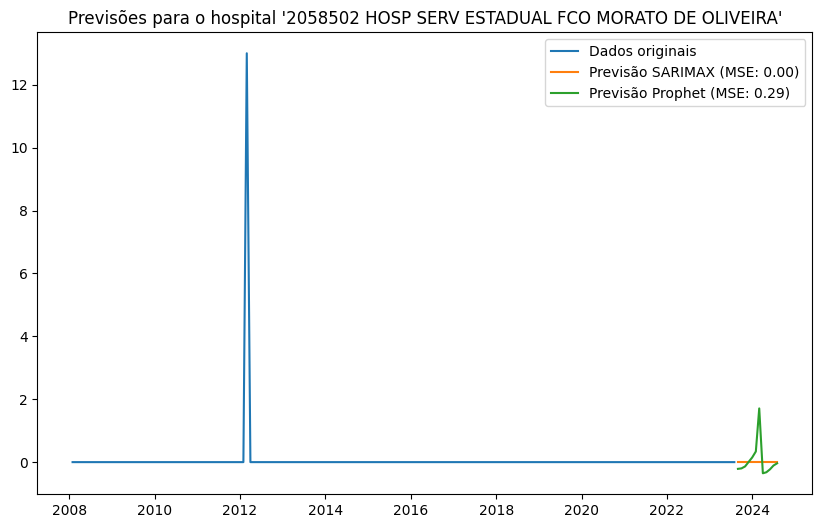

Previsão para o hospital '2077477 HOSP STA MARCELINA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2636.299, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2611.910, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2612.568, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2634.299, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2618.973, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2597.690, Time=0.52 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2593.048, Time=1.51 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2594.524, Time=0.61 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=2595.431, Time=1.65 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2592.975, Time=1.07 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2606.554, Time=0.87 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2615.317, Time=0.08 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2628.820, Time=0.70 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=2594.004, Time=1.58 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:40:38 - cmdstanpy - INFO - Chain [1] start processing
22:40:38 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 56082.28085377979
MSE do modelo Prophet: 54219.42381537274
O modelo Prophet é o melhor para este hospital.


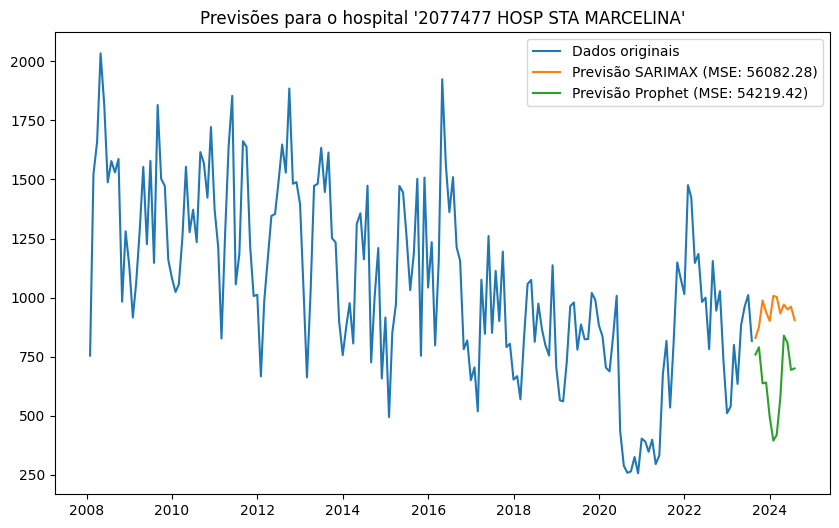

Previsão para o hospital '2076926 HOSP UNIVERSITARIO - HU/USP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2595.764, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2677.789, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2642.503, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2613.164, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2675.791, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2599.617, Time=2.37 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2602.821, Time=2.29 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2606.916, Time=1.91 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2600.379, Time=2.19 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=2603.766, Time=2.49 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(3,1,2)(1,0,1)

c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_ra

MSE do modelo SARIMAX: 29071.732695872925
MSE do modelo Prophet: 47209.27090677304
O modelo SARIMAX é o melhor para este hospital.


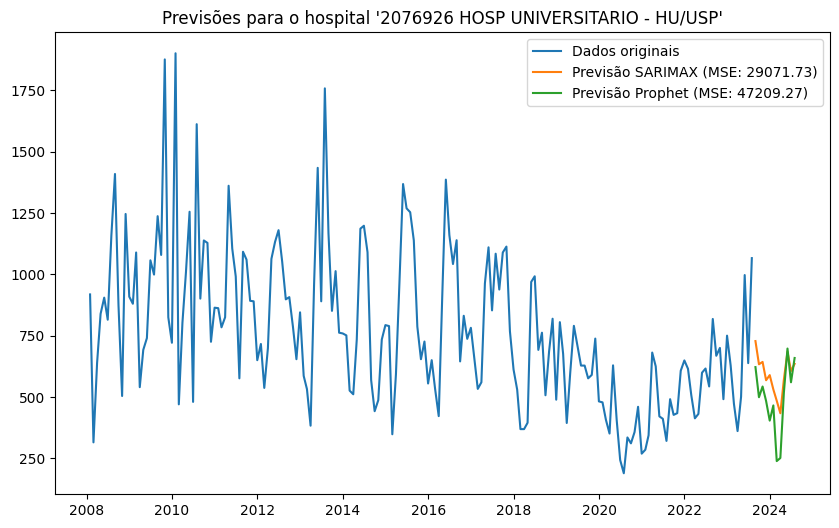

Previsão para o hospital '2077388 HOSPITAL AMPARO MATERNAL':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=13.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1694.043, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1569.554, Time=2.01 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1574.569, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1692.043, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1568.014, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1569.549, Time=2.04 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1571.542, Time=5.73 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1566.164, Time=1.14 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1568.141, Time=2.96 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1568.141, Time=2.35 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1570.130, Time=5.15 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1568.048, Time=1.89 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1565.686, Time=2.95 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1567.658, Time=3.33 sec

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:47:08 - cmdstanpy - INFO - Chain [1] start processing
22:47:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 5.652758909056387
MSE do modelo Prophet: 10.245159907185938
O modelo SARIMAX é o melhor para este hospital.


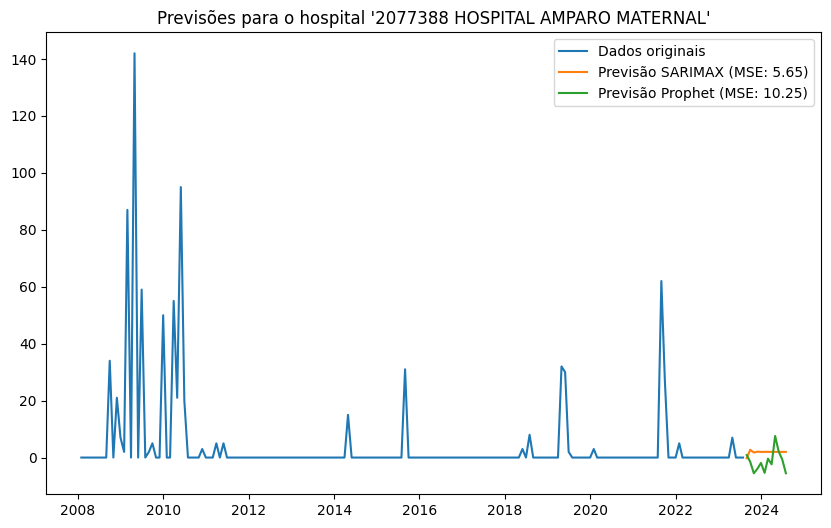

Previsão para o hospital '2089785 HOSPITAL DO RIM E HIPERTENSAO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2086.710, Time=11.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2115.474, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2099.226, Time=2.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2088.232, Time=2.81 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2113.475, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2085.462, Time=10.71 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2083.870, Time=6.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2085.481, Time=9.21 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2085.003, Time=3.17 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2082.420, Time=3.93 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2084.091, Time=5.94 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=2084.047, Time=5.30 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2084.873, Time=11.26 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2081.509, Time=2.36 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2083.245, Time=4

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:49:16 - cmdstanpy - INFO - Chain [1] start processing
22:49:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1345.5760936129527
MSE do modelo Prophet: 3386.9302817271328
O modelo SARIMAX é o melhor para este hospital.


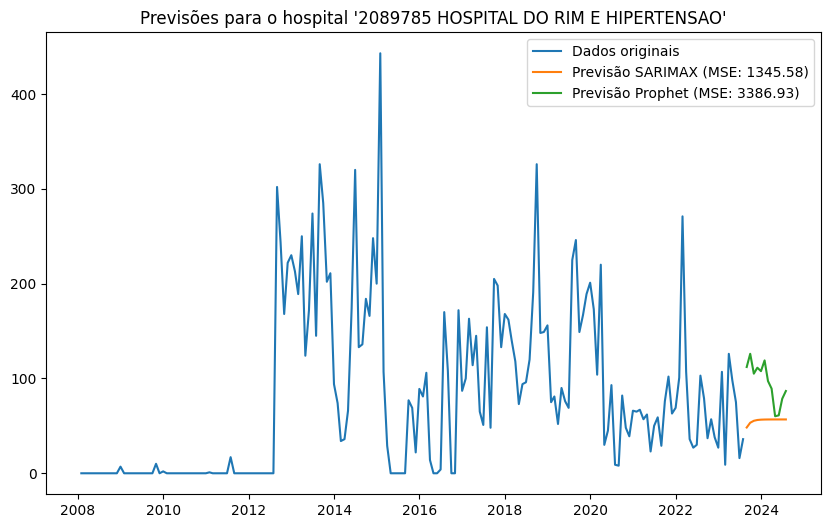

Previsão para o hospital '2089696 HOSPITAL GRAACC INSTITUTO DE ONCOLOGIA PEDIATRICA IOP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=12.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1996.880, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1940.416, Time=2.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1886.361, Time=3.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1994.979, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1885.061, Time=1.91 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1886.499, Time=3.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=7.69 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1886.970, Time=2.88 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1886.980, Time=2.77 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1939.766, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1888.646, Time=4.70 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1888.198, Time=0.73 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 42.563 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:50:00 - cmdstanpy - INFO - Chain [1] start processing
22:50:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 3336.7758896943797
MSE do modelo Prophet: 3424.73903006563
O modelo SARIMAX é o melhor para este hospital.


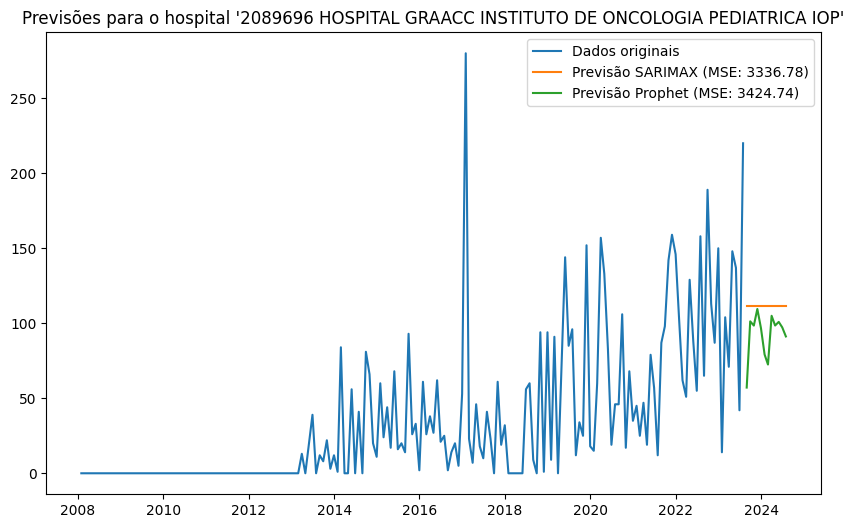

Previsão para o hospital '2058391 HOSPITAL ISRAELITA ALBERT EINSTEIN':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=11.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1895.491, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1853.940, Time=2.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1822.654, Time=2.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1893.491, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1820.820, Time=1.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1822.712, Time=2.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1815.420, Time=4.33 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1813.339, Time=7.16 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1819.325, Time=3.63 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=1814.587, Time=7.88 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1814.134, Time=5.99 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1886.514, Time=6.36 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=1812.783, Time=7.61 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=7.33 sec
 ARI

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:53:58 - cmdstanpy - INFO - Chain [1] start processing
22:53:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 5.70204512915567
MSE do modelo Prophet: 158.60249106028365
O modelo SARIMAX é o melhor para este hospital.


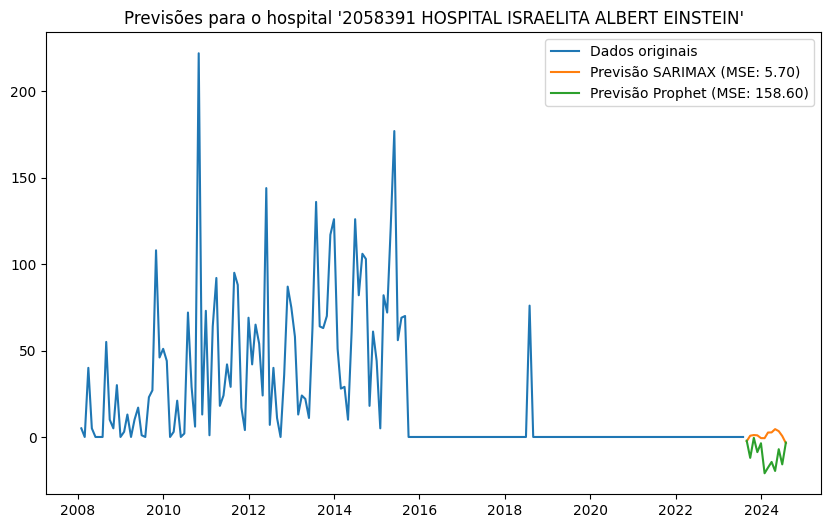

Previsão para o hospital '2082624 HOSPITAL JAPONES SANTA CRUZ':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=496.801, Time=2.84 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=484.818, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=488.807, Time=1.45 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=488.807, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=483.821, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=486.812, Time=1.09 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=486.812, Time=0.57 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=488.812, Time=0.87 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=486.813, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=486.813, Time=0.77 sec


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:54:09 - cmdstanpy - INFO - Chain [1] start processing


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=488.813, Time=0.93 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 9.684 seconds


22:54:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 0.0
MSE do modelo Prophet: 0.05859832072802874
O modelo SARIMAX é o melhor para este hospital.


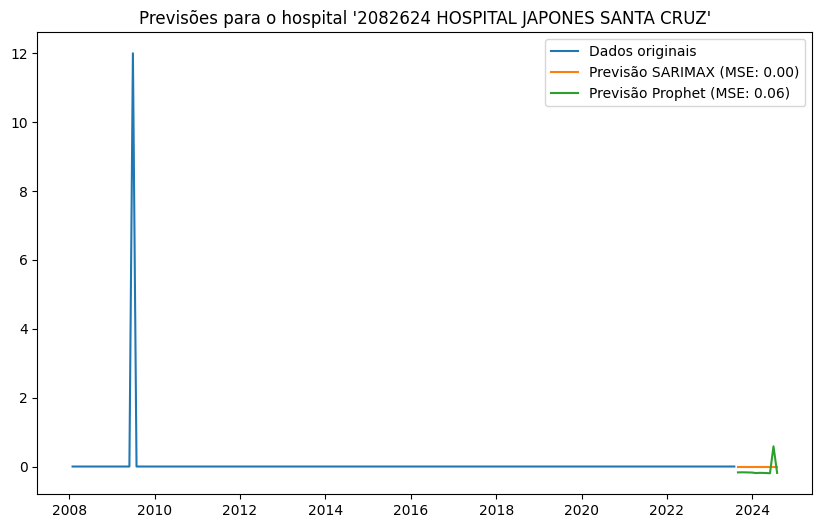

Previsão para o hospital '2077507 HOSPITAL LEFORTE - LIBERDADE':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=12.73 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1924.012, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1896.509, Time=3.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1878.953, Time=3.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1922.017, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1879.214, Time=0.89 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1879.910, Time=4.63 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1878.123, Time=3.22 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1878.676, Time=5.83 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1923.093, Time=2.36 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=1873.716, Time=5.60 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1874.252, Time=3.35 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=1873.072, Time=7.75 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1875.354, Time=4.72 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=1874.983, Time=10.62 se

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
22:58:23 - cmdstanpy - INFO - Chain [1] start processing
22:58:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 7.851153608641799
MSE do modelo Prophet: 514.1536060741254
O modelo SARIMAX é o melhor para este hospital.


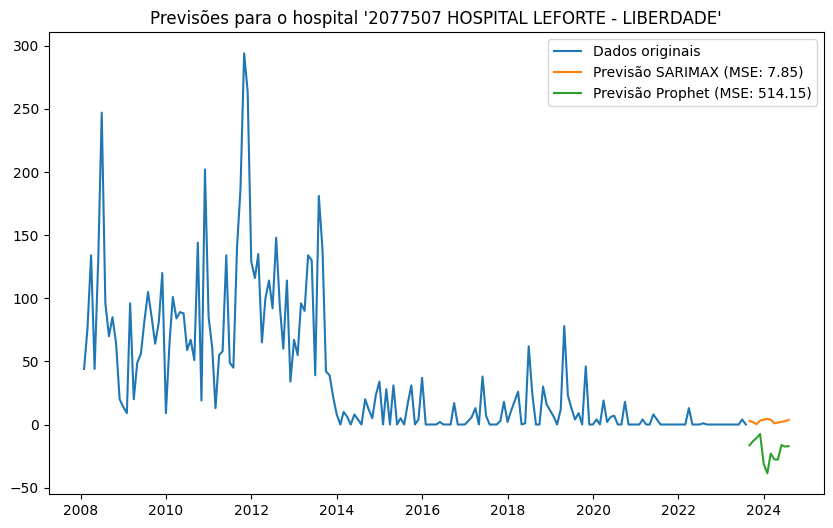

Previsão para o hospital '2076896 HOSPITAL SAO LUIZ GONZAGA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2634.892, Time=10.11 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2669.550, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2641.011, Time=4.77 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2650.811, Time=4.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3067.078, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2635.058, Time=5.21 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=2633.645, Time=7.60 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2637.403, Time=3.97 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=2630.545, Time=11.69 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=2632.564, Time=14.42 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=2631.986, Time=7.39 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=2629.871, Time=10.52 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=2632.750, Time=5.28 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=2631.693, Time=13.71 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=2634.009, Time

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
23:01:56 - cmdstanpy - INFO - Chain [1] start processing
23:01:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 144705.1719619366
MSE do modelo Prophet: 134125.13089994193
O modelo Prophet é o melhor para este hospital.


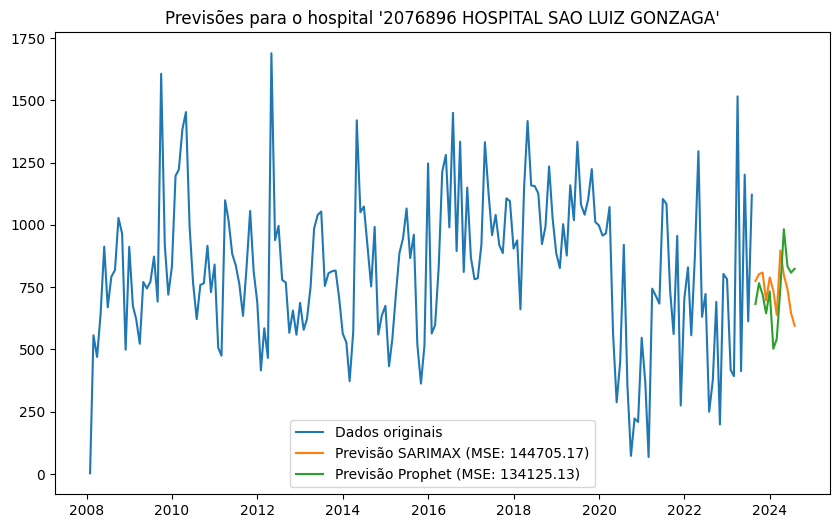

Previsão para o hospital '6891411 IBCC UNIDADE JACANA':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=975.294, Time=13.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1007.381, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=984.415, Time=1.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=980.479, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1005.381, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=11.69 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=11.46 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=977.754, Time=15.91 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=14.91 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=9.22 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=13.61 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=13.57 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=979.131, Time=16.56 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=983.006, Time=6.79 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1899.74 sec
 ARIMA(3,1,2)(1,0,1)[12] 

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
01:38:25 - cmdstanpy - INFO - Chain [1] start processing
01:38:25 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 21.3574357365672
MSE do modelo Prophet: 68.67332227652098
O modelo SARIMAX é o melhor para este hospital.


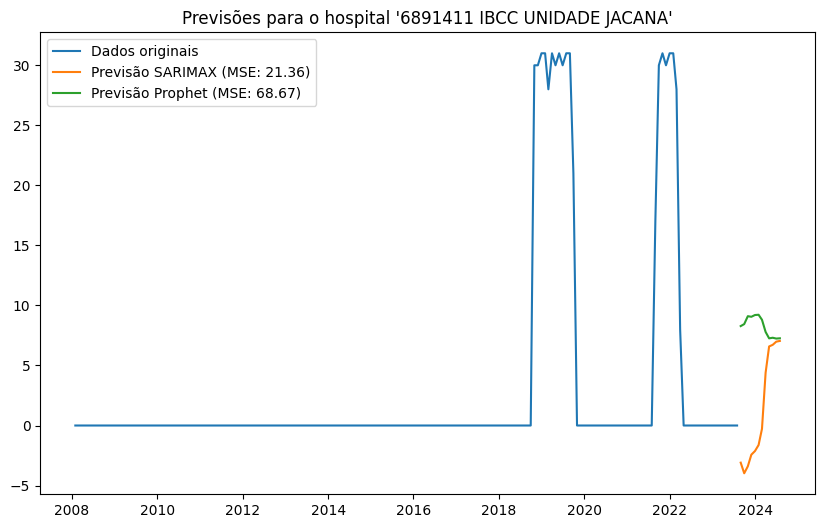

Previsão para o hospital '2077590 INST BRAS. CONTROLE CANCER-IBCC':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=12.94 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1959.109, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1893.977, Time=3.89 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1872.048, Time=2.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1957.113, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1873.567, Time=1.33 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1874.043, Time=3.56 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1874.043, Time=3.81 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1872.146, Time=2.52 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1876.044, Time=4.28 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1955.200, Time=1.77 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1873.779, Time=4.50 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1873.865, Time=3.32 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1894.364, Time=3.26 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1875.331, Time=6.28 sec

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
02:26:47 - cmdstanpy - INFO - Chain [1] start processing
02:26:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1975.1424421170286
MSE do modelo Prophet: 2384.8079236042445
O modelo SARIMAX é o melhor para este hospital.


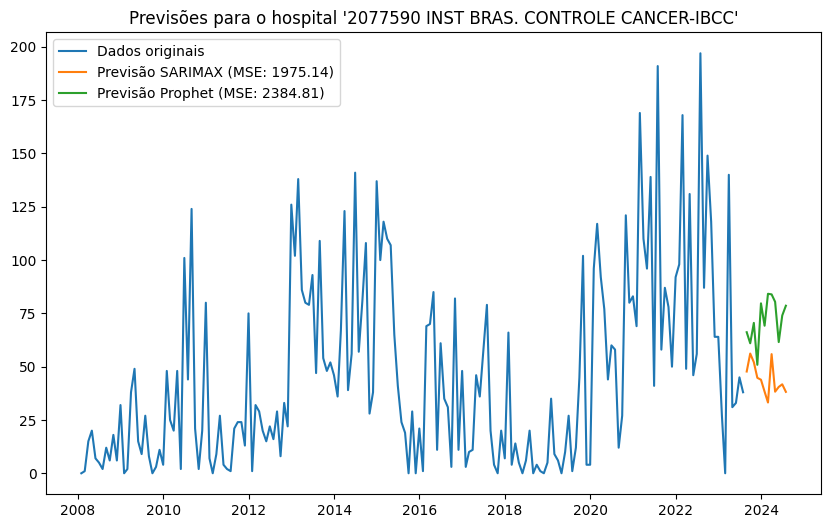

Previsão para o hospital '2091550 INST CEMA DE OFTALMO E OTORRINO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1303.235, Time=12.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1312.866, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1305.888, Time=3.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1309.443, Time=2.61 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1384.205, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1301.238, Time=6.38 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1299.487, Time=4.14 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1301.235, Time=7.94 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1298.336, Time=3.57 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=1300.133, Time=4.02 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=1300.139, Time=5.14 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1302.127, Time=9.06 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=1299.495, Time=2.49 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1298.025, Time=2.70 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1299.870, Time=3.8

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
02:28:42 - cmdstanpy - INFO - Chain [1] start processing
02:28:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 322.51030419491417
MSE do modelo Prophet: 256.3095047918709
O modelo Prophet é o melhor para este hospital.


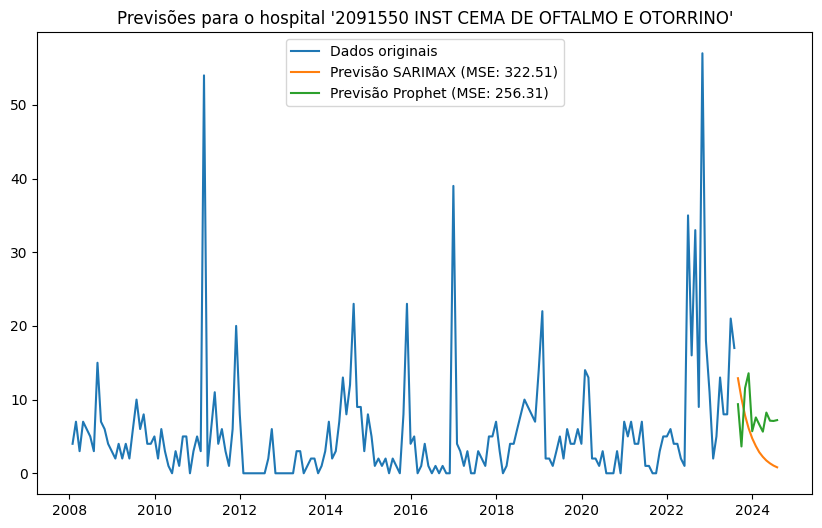

Previsão para o hospital '6123740 INST DO CANCER DO ESTADO DE SAO PAULO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2564.758, Time=509.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2636.711, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2588.551, Time=3.87 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2562.202, Time=5.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2634.818, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2560.568, Time=2.34 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2562.198, Time=3.98 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2563.931, Time=11.55 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2561.853, Time=4.83 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2561.975, Time=3.82 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2586.771, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2563.017, Time=5.43 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2560.666, Time=1.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 551.906 seconds


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
02:37:57 - cmdstanpy - INFO - Chain [1] start processing
02:37:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 184835.36247218295
MSE do modelo Prophet: 149039.3488942547
O modelo Prophet é o melhor para este hospital.


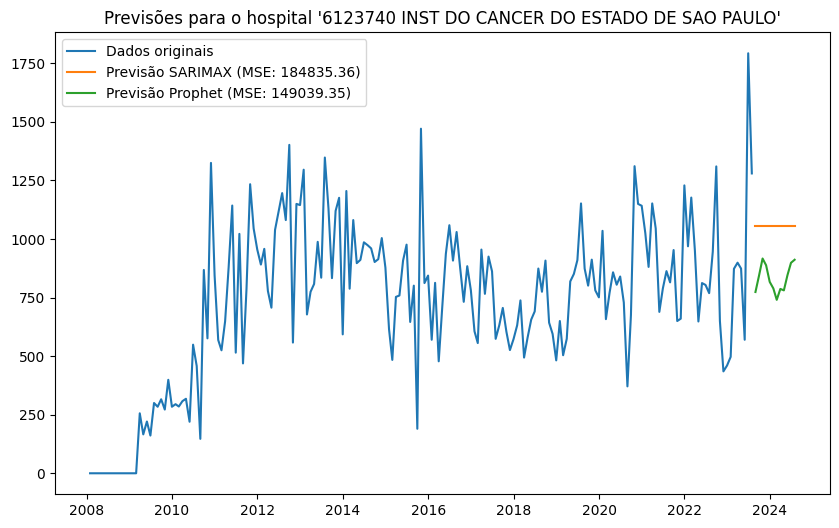

Previsão para o hospital '2071568 INST DO CORACAO - INCOR - HC/FMUSP':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=13.71 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2584.600, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2549.496, Time=1.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2521.908, Time=3.98 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2582.653, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2521.125, Time=1.88 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2521.558, Time=4.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=8.53 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2518.977, Time=4.14 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2520.012, Time=6.43 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2520.215, Time=6.90 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=9.94 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2547.539, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2519.914, Time=5.44 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2520.210, Time=5.66 sec
 ARIMA(0,

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
03:37:58 - cmdstanpy - INFO - Chain [1] start processing
03:37:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 25594.757354266785
MSE do modelo Prophet: 36403.95308422762
O modelo SARIMAX é o melhor para este hospital.


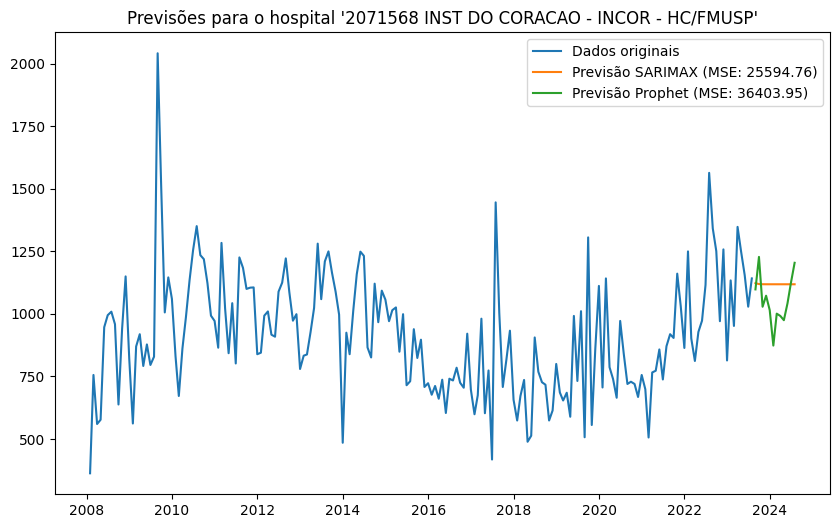

Previsão para o hospital '2080125 INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=9.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1961.116, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1916.320, Time=2.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1893.713, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1959.123, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1891.727, Time=1.86 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1893.710, Time=2.95 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=9.71 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=5.24 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1889.806, Time=2.22 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1891.656, Time=3.55 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1891.681, Time=3.23 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=10.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1890.081, Time=4.33 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=7.39 sec
 ARIMA(1,1,3)(0,0,0

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
05:37:34 - cmdstanpy - INFO - Chain [1] start processing
05:37:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 1538.677056386933
MSE do modelo Prophet: 1975.9923659373487
O modelo SARIMAX é o melhor para este hospital.


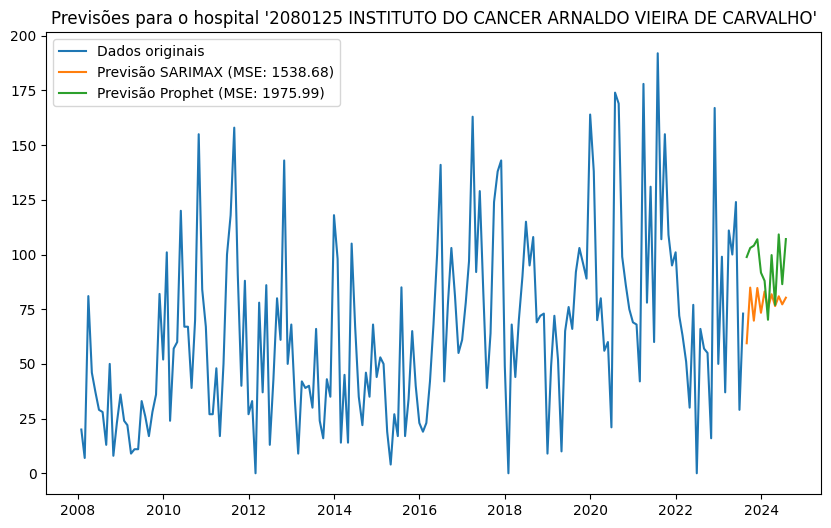

Previsão para o hospital '2688689 SANTA CASA DE SAO PAULO':
Performing stepwise search to minimize aic


C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=17.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2765.111, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2731.947, Time=3.48 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2711.517, Time=4.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2763.132, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2710.634, Time=1.65 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2711.771, Time=4.82 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2712.927, Time=5.80 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2703.484, Time=6.62 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2705.174, Time=10.41 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2705.037, Time=8.79 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2706.431, Time=5.11 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2730.228, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2702.980, Time=3.33 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2704.376, Time=3.94 se

C:\Users\Thiago\AppData\Local\Temp\ipykernel_23520\2245924110.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
05:40:10 - cmdstanpy - INFO - Chain [1] start processing
05:40:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Thiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MSE do modelo SARIMAX: 110966.62215247592
MSE do modelo Prophet: 56191.8344927769
O modelo Prophet é o melhor para este hospital.


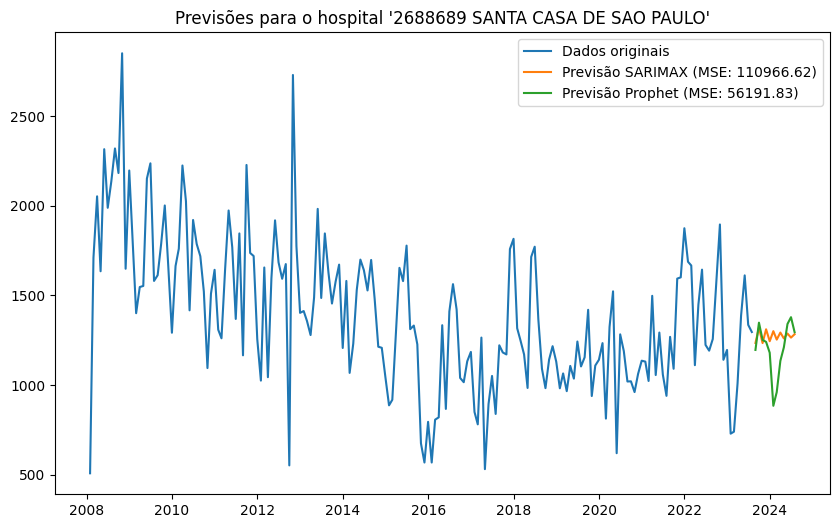

            2077531 A C CAMARGO CANCER CENTER  \
2023-08-31                          15.357458   
2023-09-30                          11.578164   
2023-10-31                          13.329863   
2023-11-30                          13.793676   
2023-12-31                          11.640546   
2024-01-31                          14.528179   
2024-02-29                          11.921541   
2024-03-31                          13.493915   
2024-04-30                          13.260500   
2024-05-31                          12.314923   
2024-06-30                          13.944509   
2024-07-31                          12.250644   

            2077655 ASSOC AACD V CLEMENTINO  \
2023-08-31                         7.707226   
2023-09-30                         5.437092   
2023-10-31                         7.313608   
2023-11-30                         6.971638   
2023-12-31                         5.005521   
2024-01-31                         4.171253   
2024-02-29                       

In [24]:
# Função para preparar a visão de internações por mês/ano de um hospital específico
def prepare_time_series_for_hospital(data, hospital_name):
    # Filtrar o dataframe pelo hospital desejado
    data_hospital = data[data['Hospital'].str.contains(hospital_name, na=False, case=False)]

    # Se não encontrar o hospital, retorne None
    if data_hospital.empty:
        print(f"Hospital '{hospital_name}' não encontrado.")
        return None

    # Transformando o índice
    data_hospital.set_index(['Ano', 'Mês'], inplace=True)
    data_hospital.sort_index(inplace=True)

    # Selecionar a coluna de internações
    data_hospital = data_hospital['Internações']

    # Definir uma frequência mensal para o índice
    data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')

    return data_hospital

# Função de previsão usando SARIMAX com auto_arima
def forecast_time_series(data, steps=12):
    # Use auto_arima para encontrar os melhores hiperparâmetros do modelo SARIMA
    model = auto_arima(data, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore',
                      suppress_warnings=True, max_order=None)

    # Ajustar o modelo SARIMAX com os hiperparâmetros encontrados
    sarimax_model = SARIMAX(data, order=model.order, seasonal_order=model.seasonal_order)
    fitted_model = sarimax_model.fit(disp=False)

    # Fazer previsões
    forecast = fitted_model.get_forecast(steps=steps)
    forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Construir dataframe de previsão
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
        'Lower CI': forecast_conf_int.iloc[:, 0],
        'Upper CI': forecast_conf_int.iloc[:, 1]
    }, index=forecast_index)

    return forecast_df

# Função de previsão usando Prophet
def forecast_time_series_prophet(data):
    # Preparar o dataframe para o Prophet
    data_prophet = pd.DataFrame({
        'ds': data.index,
        'y': data.values
    })

    # Ajustar o modelo Prophet
    prophet_model = Prophet()
    prophet_model.fit(data_prophet)

    # Fazer previsões
    future = prophet_model.make_future_dataframe(periods=12, freq='M')
    forecast = prophet_model.predict(future)

    return forecast.set_index('ds')['yhat']

# Função para calcular o MSE
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Carregar o arquivo CSV
data = df_serie_hist

# Obter os nomes únicos dos hospitais
hospital_names = data['Hospital'].unique()

# Criar um DataFrame vazio para armazenar as previsões
forecast_df = pd.DataFrame()

# Iterar sobre os nomes dos hospitais e fazer previsões para cada um
for hospital_name in hospital_names:
    print(f"Previsão para o hospital '{hospital_name}':")
    # Preparar a série temporal para o hospital específico
    hospital_time_series = prepare_time_series_for_hospital(data, hospital_name)

    # Se hospital_time_series não for None, faça a previsão
    if hospital_time_series is not None:
        # Previsão com SARIMAX
        hospital_forecast_sarimax = forecast_time_series(hospital_time_series)
        # Previsão com Prophet
        hospital_forecast_prophet = forecast_time_series_prophet(hospital_time_series)

        # Calcular o MSE para cada previsão
        mse_sarimax = calculate_mse(hospital_time_series[-12:], hospital_forecast_sarimax['Forecast'])
        mse_prophet = calculate_mse(hospital_time_series[-12:], hospital_forecast_prophet[-12:])

        # Imprimir os MSEs
        print(f"MSE do modelo SARIMAX: {mse_sarimax}")
        print(f"MSE do modelo Prophet: {mse_prophet}")

        # Comparar os MSEs e escolher o melhor modelo
        if mse_sarimax < mse_prophet:
            print("O modelo SARIMAX é o melhor para este hospital.")
            best_forecast = hospital_forecast_sarimax['Forecast']
        else:
            print("O modelo Prophet é o melhor para este hospital.")
            best_forecast = hospital_forecast_prophet[-12:]

        # Adicionar as previsões do melhor modelo ao DataFrame de previsões
        forecast_df[hospital_name] = best_forecast

        # Plotar as previsões
        plt.figure(figsize=(10, 6))
        plt.plot(hospital_time_series, label='Dados originais')
        plt.plot(hospital_forecast_sarimax['Forecast'], label=f'Previsão SARIMAX (MSE: {mse_sarimax:.2f})')
        plt.plot(hospital_forecast_prophet[-12:], label=f'Previsão Prophet (MSE: {mse_prophet:.2f})')
        plt.legend()
        plt.title(f"Previsões para o hospital '{hospital_name}'")
        plt.show()

# Imprimir o DataFrame de previsões
print(forecast_df)